In [44]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Loading and preprocessing

In [46]:
df = pd.read_csv("/content/drive/My Drive/sensor_traffic_observation_divisioneAc_results.csv")

In [47]:
sp = pd.read_csv("/content/drive/My Drive/demo_spatial_distances.csv")

In [48]:
# GENERAZIONE DI DEMO_SPATIAL DISTANCES

# df = pd.read_csv("/content/drive/My Drive/pairwise_spatial_distances.csv")

# sens = ['R029_S1', 'R029_S2', 'R030_S1', 'R030_S2', 'R031_S1', 'R031_S2', 'R032_S1', 'R092_S1', 'R131_SM83', 'R133_S2',
#         'R133_S4', 'R134_S1', 'R134_S2', 'R154_S2', 'R154_S1', 'R085_S2', 'R116_S2', 'R085_S1', 'R028_S1', 'R028_S2',
#         'R028_S3', 'R032_S2', 'R032_SM46', 'R069_S1', 'R069_S4', 'R069_SM67', 'R069_S3', 'R071_S1', 'R074_S3', 'R071_S2',
#         'R074_S2', 'R074_S1', 'R077_S2', 'R126_S1', 'R131_S1', 'R131_SM82', 'R126_S2', 'R131_S2', 'R141_S1', 'R141_S2',
#         'R142_S2', 'R142_S1', 'R001_SM2', 'R001_SM3', 'R002_S1', 'R135_S2', 'R003_SM7', 'R002_S2', 'R002_S4', 'R002_S5',
#         'R003_SM6', 'R003_SM9', 'R003_SM8', 'R001_SM1', 'R116_S1', 'R135_S1']

# sens_comb_col1 = []
# sens_comb_col2 = []
# demo_spatial_distances = pd.DataFrame(columns=df.columns)

# for id1 in sens:
#   for id2 in sens:
#     if id1 <= id2:
#       sens_comb_col1.append(id1)
#       sens_comb_col2.append(id2)
#       # print(df["id1"]==id1)
#       # print((df["id1"]==id1) and (df["id2"]==id2).all())
#       dist = df[(df['id1'] ==id1) & (df['id2'] ==id2)]["dist"].item()
#       dict1 = {"id1":id1, "id2":id2, "dist":dist}
#       demo_spatial_distances = demo_spatial_distances.append(dict1, ignore_index = True) 

# print(demo_spatial_distances)

In [6]:
df

id                 time  sum_flow  avg_speed  clusterID
0       R001_SM1  2019-04-01 00:00:00      10.0  39.550000          0
1       R001_SM2  2019-04-01 00:00:00       0.0  20.000000          0
2       R001_SM3  2019-04-01 00:00:00       3.0  28.000000          0
3        R002_S1  2019-04-01 00:00:00       2.0  13.000000          2
4        R002_S2  2019-04-01 00:00:00       0.0   0.000000          1
...          ...                  ...       ...        ...        ...
136580   R141_S1  2019-04-30 23:45:00       0.0  16.000000        170
136581   R141_S2  2019-04-30 23:45:00       0.0   2.000000        170
136582   R142_S1  2019-04-30 23:45:00       3.0  16.333333        177
136583   R142_S2  2019-04-30 23:45:00      35.0  23.794118        177
136584   R154_S1  2019-04-30 23:45:00       1.0  16.000000         79

[136585 rows x 5 columns]

In [7]:
df[df["clusterID"]==-1]

id                 time  sum_flow  avg_speed  clusterID
15        R030_S2  2019-04-01 00:00:00       0.0   0.000000         -1
17        R031_S2  2019-04-01 00:00:00       1.0  58.666667         -1
27        R077_S2  2019-04-01 00:00:00       0.0  40.000000         -1
35      R131_SM83  2019-04-01 00:00:00       4.0  51.000000         -1
73        R074_S3  2019-04-01 00:15:00       0.0  25.000000         -1
...           ...                  ...       ...        ...        ...
136512  R032_SM46  2019-04-30 23:30:00       0.0  22.000000         -1
136530    R134_S1  2019-04-30 23:30:00       3.0  22.500000         -1
136533    R135_S2  2019-04-30 23:30:00       1.0  35.333333         -1
136566    R085_S1  2019-04-30 23:45:00       1.0  18.000000         -1
136575    R133_S4  2019-04-30 23:45:00       8.0  57.500000         -1

[2688 rows x 5 columns]

In [8]:
sensors = set(df["id"])
sensors

{'R001_SM1',
 'R001_SM2',
 'R001_SM3',
 'R002_S1',
 'R002_S2',
 'R002_S4',
 'R002_S5',
 'R003_SM7',
 'R003_SM8',
 'R003_SM9',
 'R028_S1',
 'R028_S2',
 'R028_S3',
 'R029_S1',
 'R029_S2',
 'R030_S2',
 'R031_S1',
 'R031_S2',
 'R032_S1',
 'R032_S2',
 'R032_SM46',
 'R069_S1',
 'R069_S4',
 'R069_SM67',
 'R071_S1',
 'R071_S2',
 'R074_S1',
 'R074_S3',
 'R077_S2',
 'R085_S1',
 'R085_S2',
 'R092_S1',
 'R116_S1',
 'R116_S2',
 'R131_S1',
 'R131_S2',
 'R131_SM82',
 'R131_SM83',
 'R133_S2',
 'R133_S4',
 'R134_S1',
 'R134_S2',
 'R135_S1',
 'R135_S2',
 'R141_S1',
 'R141_S2',
 'R142_S1',
 'R142_S2',
 'R154_S1'}

In [9]:
sensor_to_plot = "R002_S2"

In [10]:
sp1 = sp[sp["id1"] == sensor_to_plot]
sp2 = sp[sp["id2"] == sensor_to_plot]
sp_sensor = pd.concat([sp1, sp2], ignore_index=True)

In [11]:
sp_sensor.sort_values("dist")

id1        id2         dist
44   R002_S2    R002_S2     0.000000
55   R002_S2    R002_S2     0.000000
45   R002_S2    R002_S4     2.364157
54   R002_S1    R002_S2     2.663754
46   R002_S2    R002_S5    18.042590
30   R002_S2    R074_S2   206.391697
31   R002_S2    R074_S1   232.949695
10   R002_S2    R133_S4   237.617603
28   R002_S2    R074_S3   245.693042
9    R002_S2    R133_S2   270.832236
12   R002_S2    R134_S2   272.008543
11   R002_S2    R134_S1   316.380025
48   R002_S2   R003_SM9   360.386698
49   R002_S2   R003_SM8   362.143436
47   R002_S2   R003_SM6   364.005045
43   R002_S2   R003_SM7   423.304175
56  R001_SM1    R002_S2   439.437841
53  R001_SM3    R002_S2   452.107979
52  R001_SM2    R002_S2   458.097081
22   R002_S2  R032_SM46   464.468124
6    R002_S2    R032_S1   467.203194
18   R002_S2    R028_S1   489.503090
21   R002_S2    R032_S2   492.916306
19   R002_S2    R028_S2   529.391620
20   R002_S2    R028_S3   538.008295
42   R002_S2    R135_S2   551.258206
14   R002_S2    R154_S1   551.832034
51   R002_S2    R135_S1   570.500017
13   R002_S2    R154_S2   579.905555
1    R002_S2    R029_S2   650.266464
0    R002_S2    R029_S1   668.838075
38   R002_S2    R141_S1   744.753099
39   R002_S2    R141_S2   752.835895
3    R002_S2    R030_S2   753.087400
32   R002_S2    R077_S2   772.350585
2    R002_S2    R030_S1   791.194943
16   R002_S2    R116_S2   804.758441
4    R002_S2    R031_S1   807.201449
50   R002_S2    R116_S1   814.463465
35   R002_S2  R131_SM82   854.878250
37   R002_S2    R131_S2   856.773463
8    R002_S2  R131_SM83   858.081068
5    R002_S2    R031_S2   867.526774
34   R002_S2    R131_S1   882.925486
40   R002_S2    R142_S2   886.341639
41   R002_S2    R142_S1   896.137362
23   R002_S2    R069_S1   913.701399
25   R002_S2  R069_SM67   925.208494
24   R002_S2    R069_S4   928.434477
27   R002_S2    R071_S1   941.546189
29   R002_S2    R071_S2   950.506098
26   R002_S2    R069_S3   980.850368
7    R002_S2    R092_S1  1015.794241
15   R002_S2    R085_S2  1111.920816
17   R002_S2    R085_S1  1145.001500
33   R002_S2    R126_S1  1268.075872
36   R002_S2    R126_S2  1272.331670

# Visualization

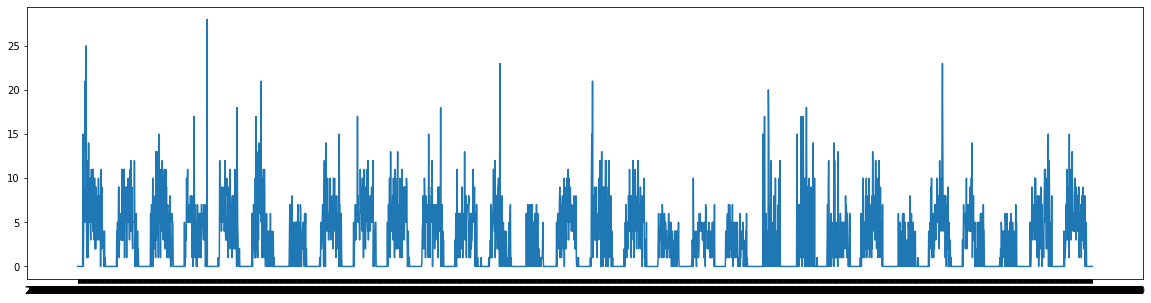

In [12]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['sum_flow'])

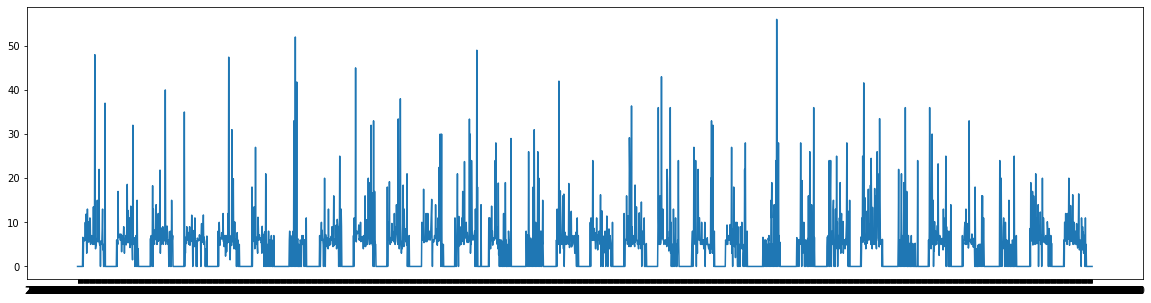

In [13]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['avg_speed'])

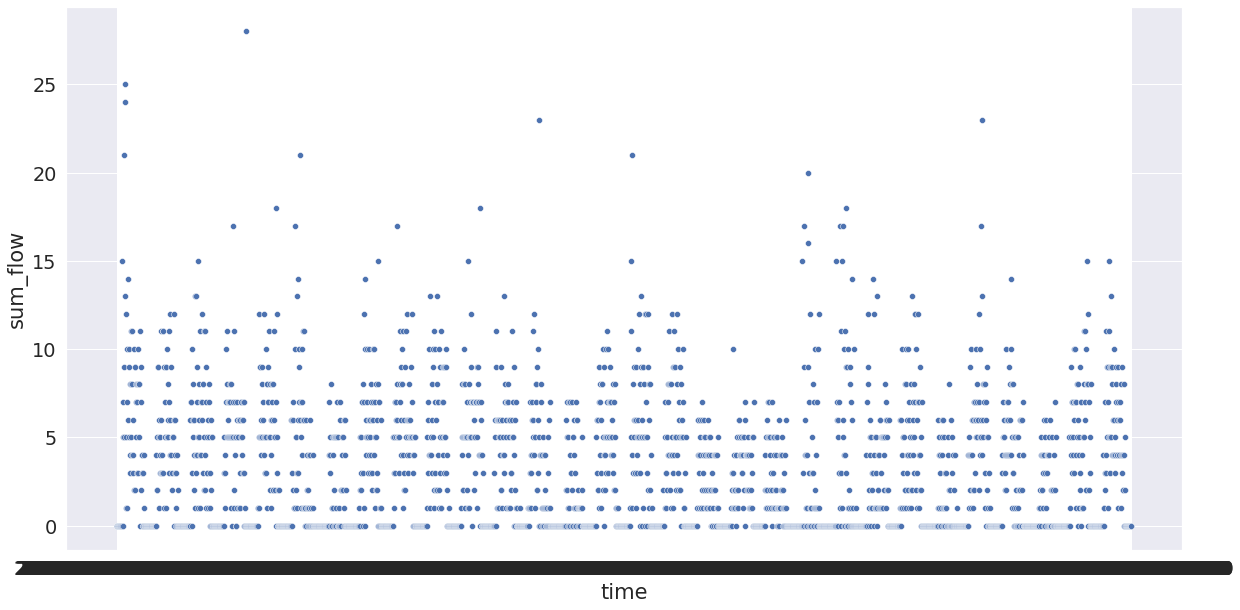

In [14]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="sum_flow", data=df[df["id"]==sensor_to_plot])

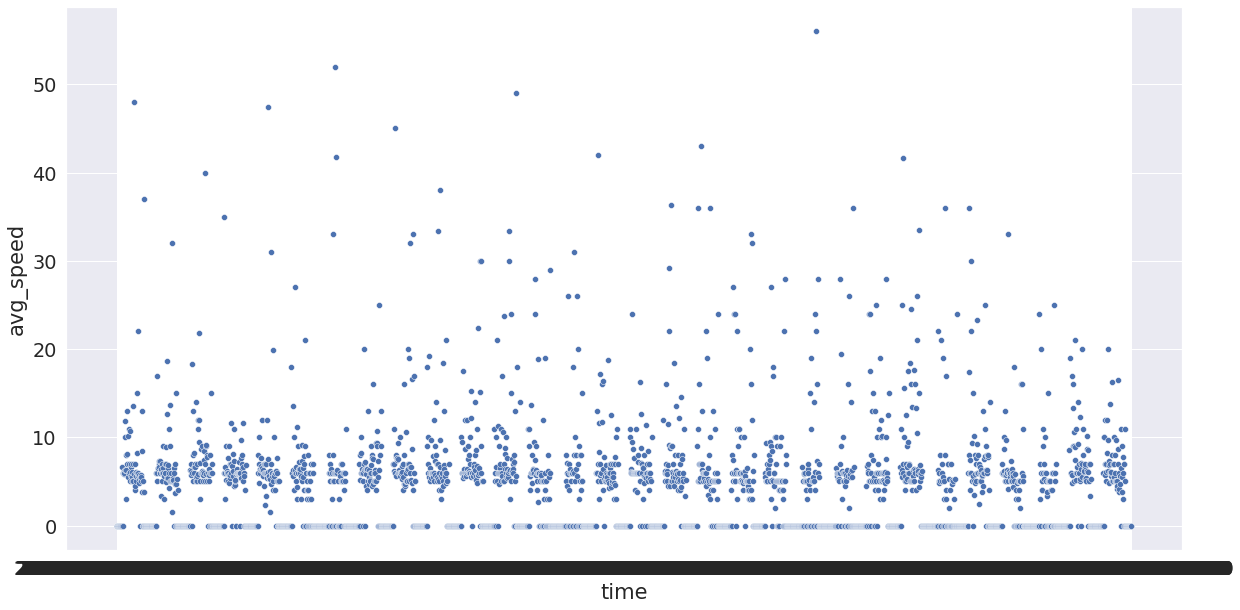

In [15]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="avg_speed", data=df[df["id"]==sensor_to_plot])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


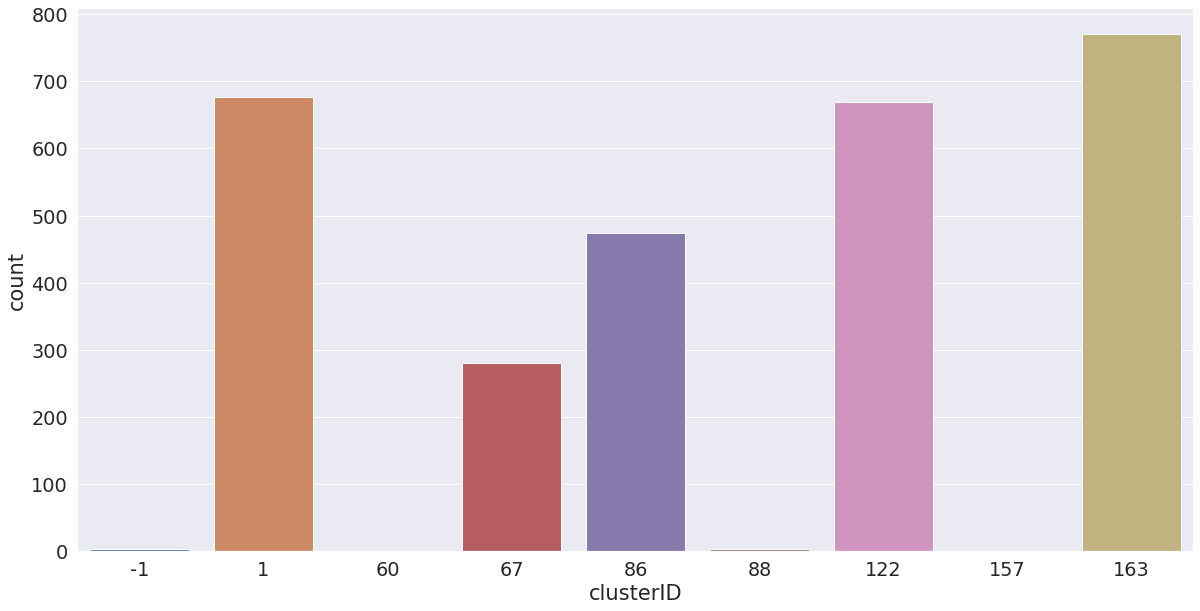

In [16]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.countplot(df[df["id"]==sensor_to_plot].clusterID)

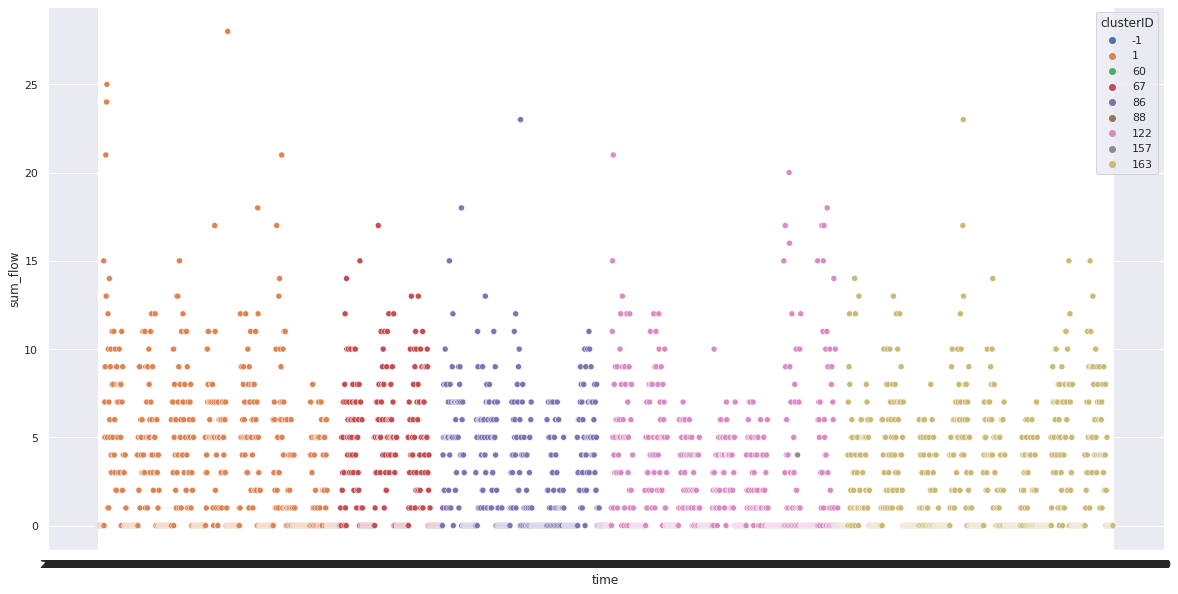

In [17]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="clusterID", palette="deep")

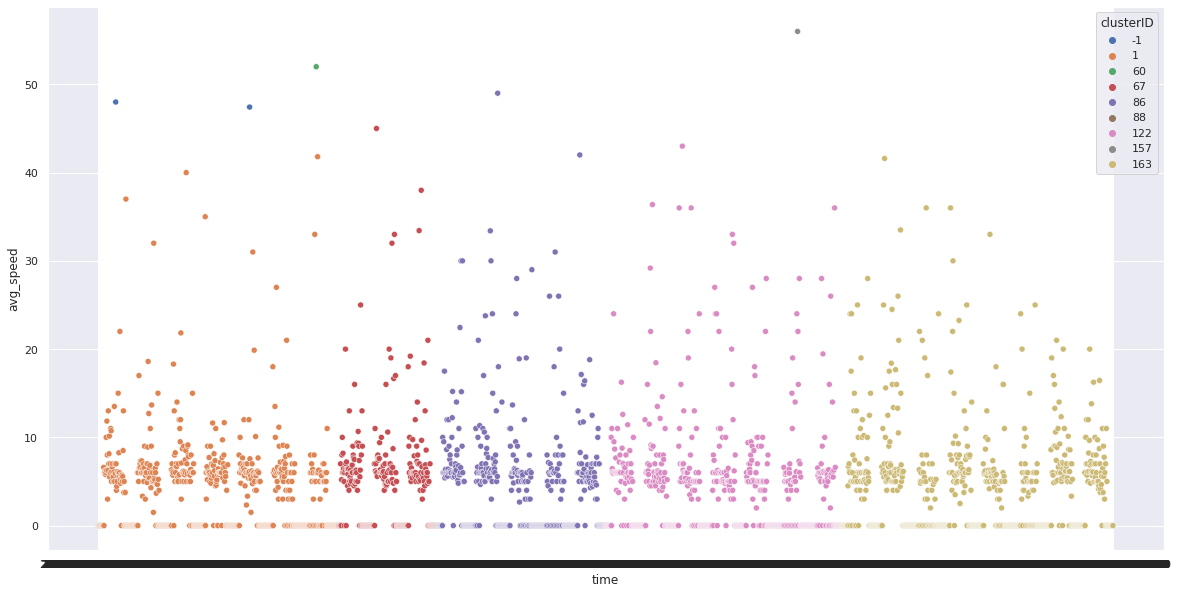

In [18]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="clusterID", palette="deep")

In [19]:
mapping = {-1: 1, -2:2}

df["label"] = 0
df["label"] = df[df["id"]==sensor_to_plot]["clusterID"].map(mapping).fillna(0)

df[df["label"]==1].sum()

id                                R002_S2R002_S2R002_S2R002_S2
time         2019-04-01 01:45:002019-04-01 02:00:002019-04-...
sum_flow                                                     9
avg_speed                                              95.4286
clusterID                                                   -4
label                                                        4
dtype: object

### Noise

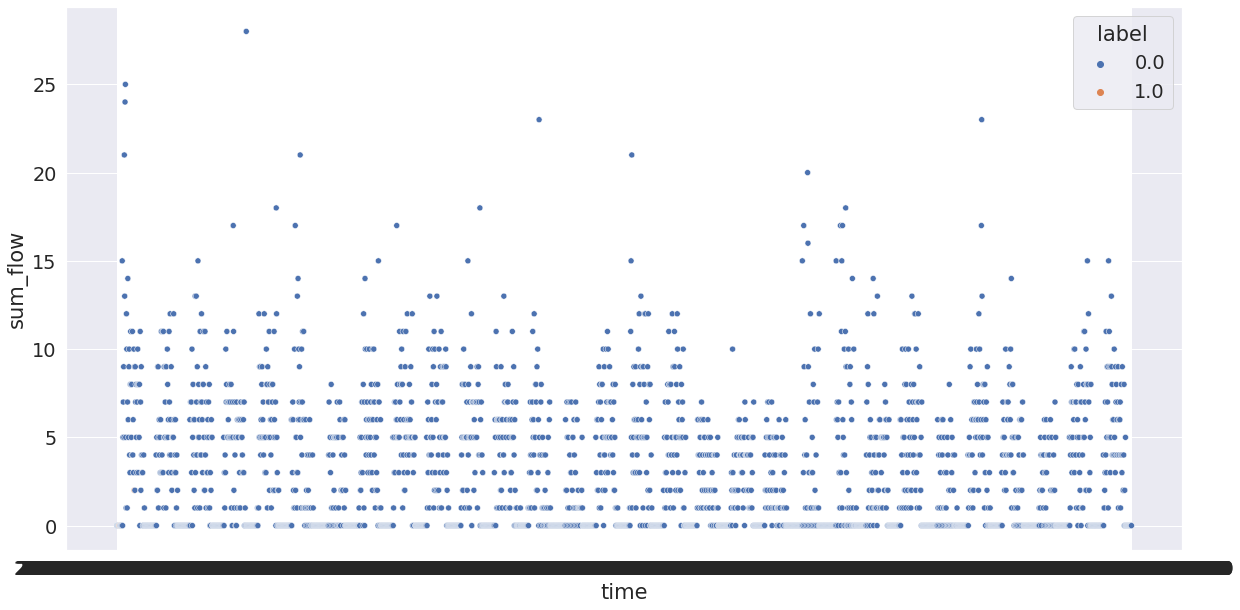

In [20]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="label")

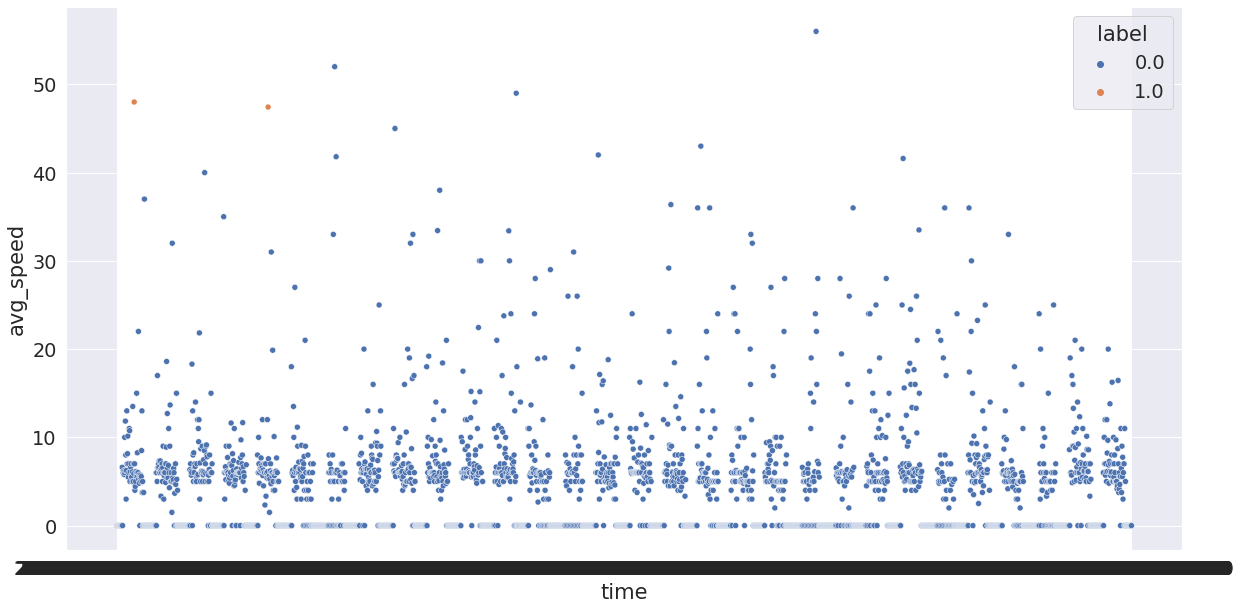

In [21]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="label")

# Nearest Sensor

In [22]:
sensor_to_plot = "R002_S4"

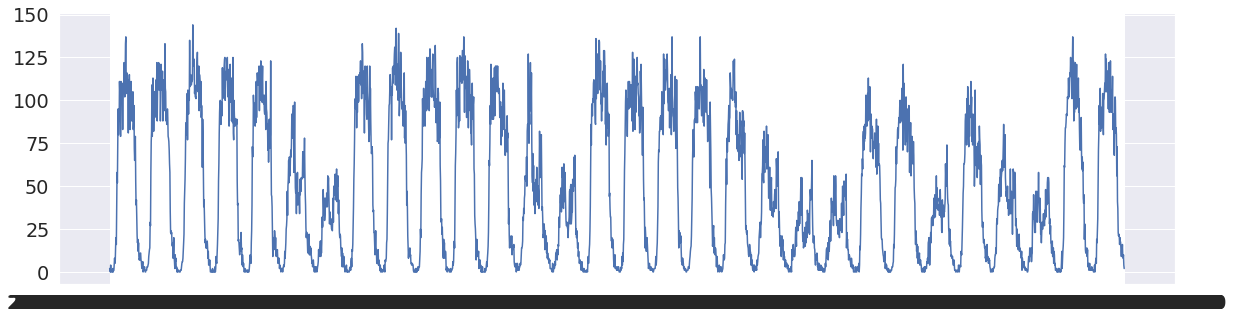

In [23]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['sum_flow'])

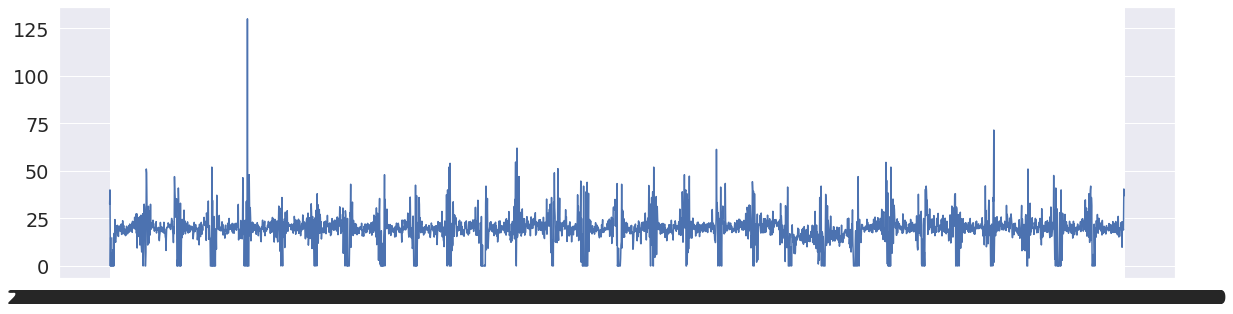

In [24]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['avg_speed'])

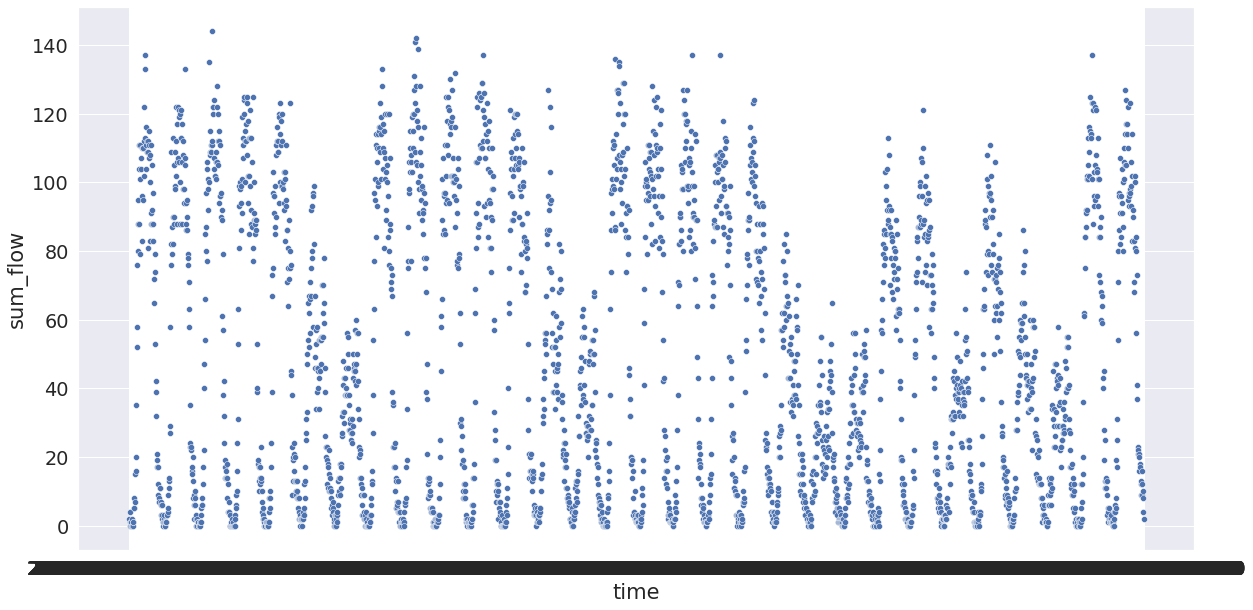

In [25]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="sum_flow", data=df[df["id"]==sensor_to_plot])

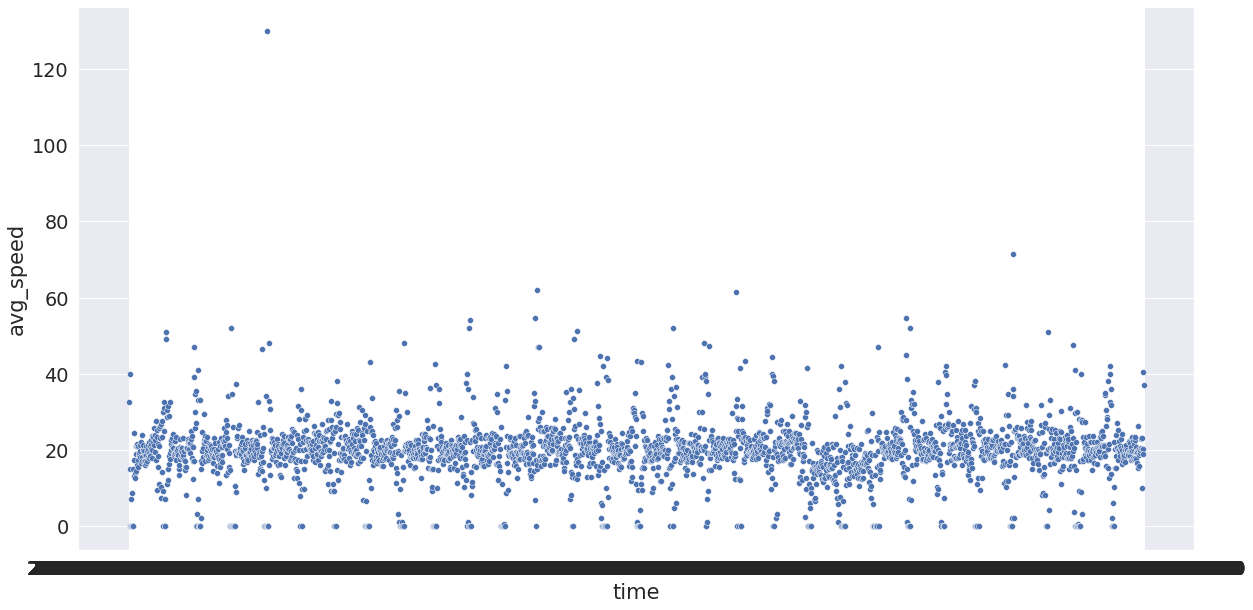

In [26]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="avg_speed", data=df[df["id"]==sensor_to_plot])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


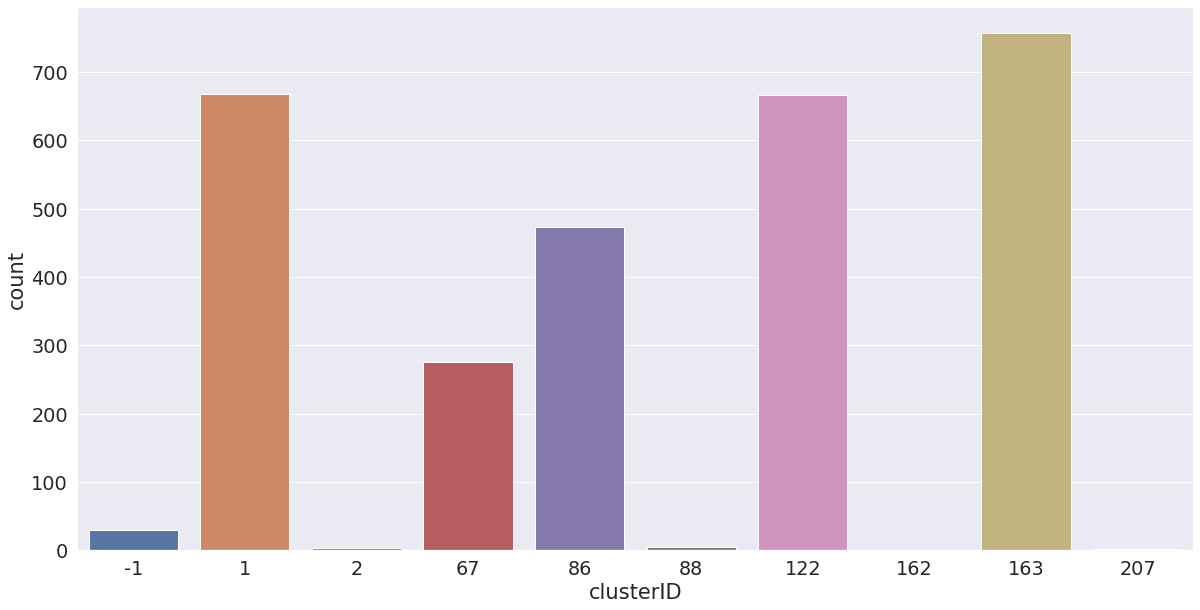

In [27]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.countplot(df[df["id"]==sensor_to_plot].clusterID)

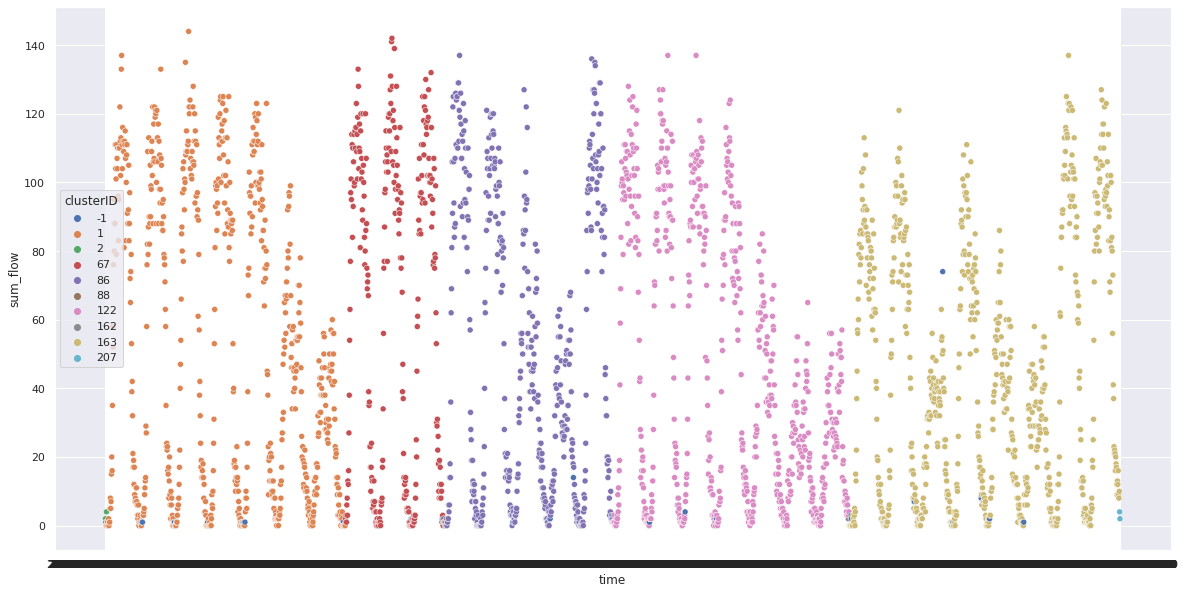

In [28]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="clusterID", palette="deep")

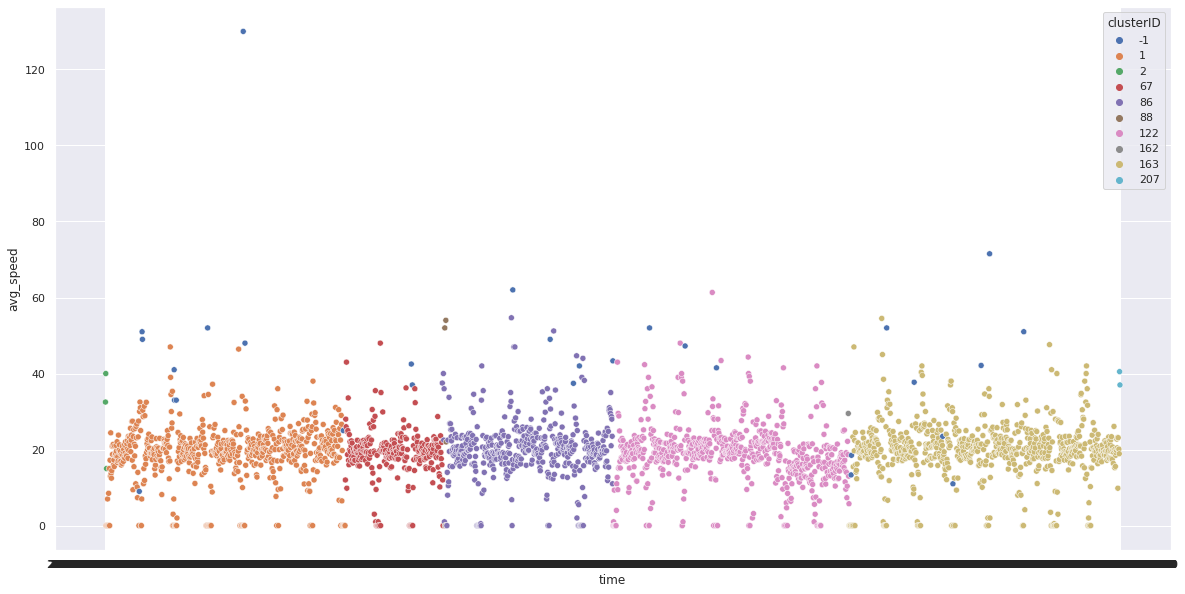

In [29]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="clusterID", palette="deep")

In [30]:
mapping = {-1: 1, -2:2}

df["label"] = 0
df["label"] = df[df["id"]==sensor_to_plot]["clusterID"].map(mapping).fillna(0)

df[df["label"]==1].sum()

id           R002_S4R002_S4R002_S4R002_S4R002_S4R002_S4R002...
time         2019-04-02 00:00:002019-04-02 02:00:002019-04-...
sum_flow                                                   141
avg_speed                                              1245.67
clusterID                                                  -29
label                                                       29
dtype: object

### Noise

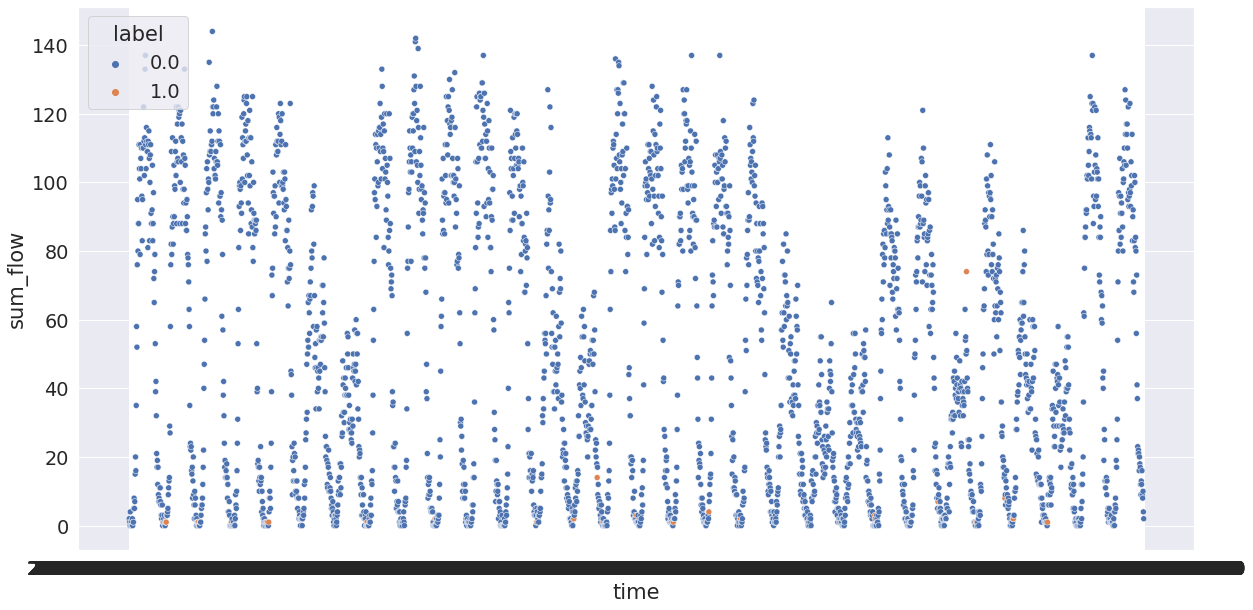

In [31]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="label")

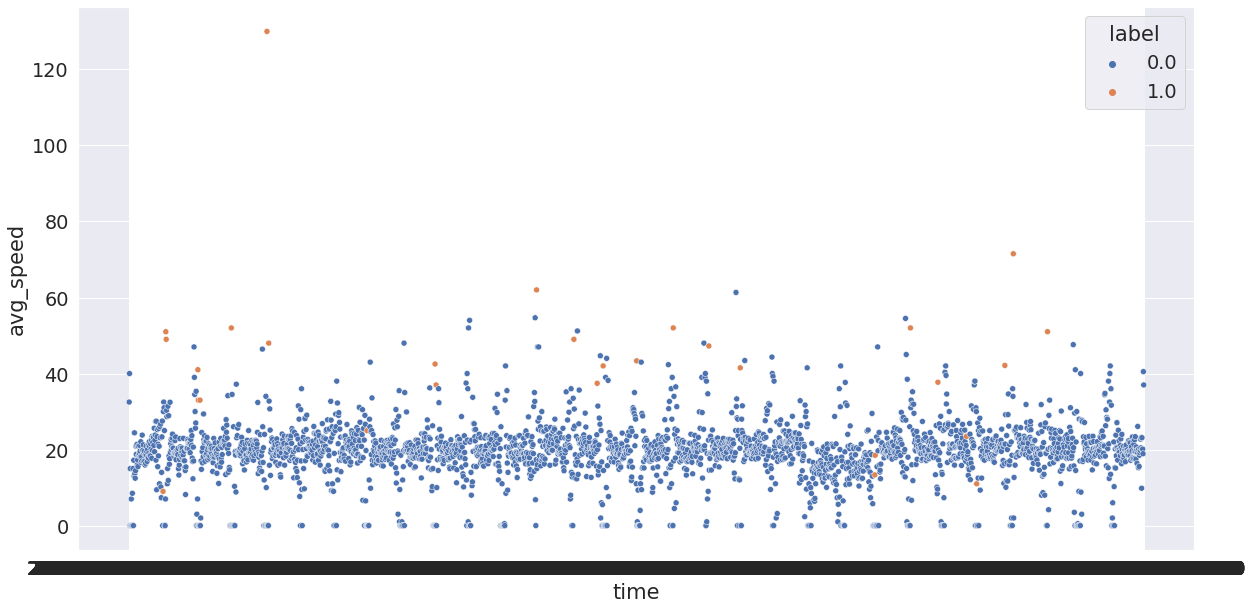

In [32]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="label")

# Nearest Sensor 2

In [33]:
sensor_to_plot = "R002_S1"

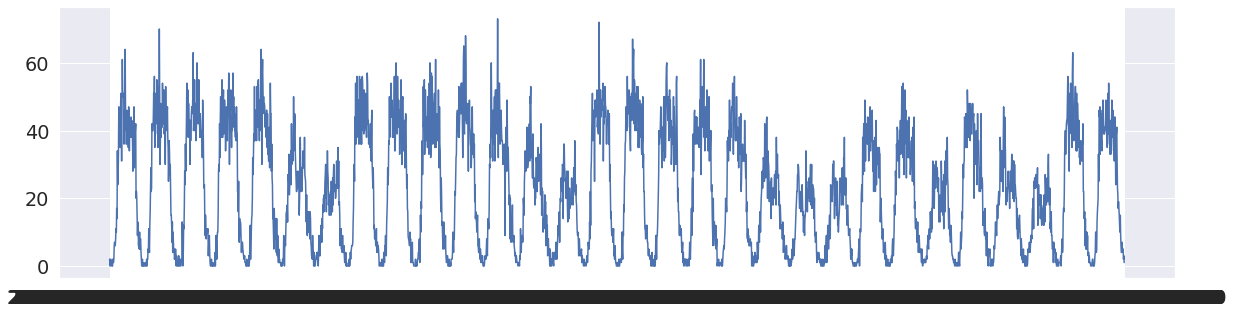

In [34]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['sum_flow'])

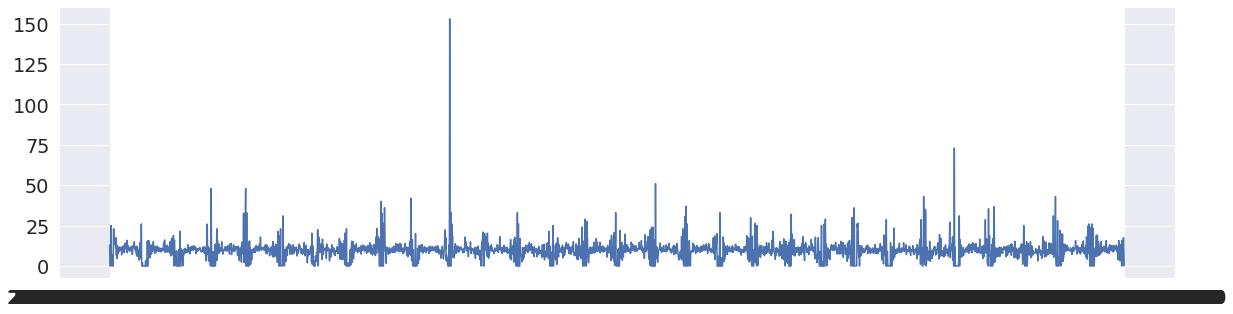

In [35]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['avg_speed'])

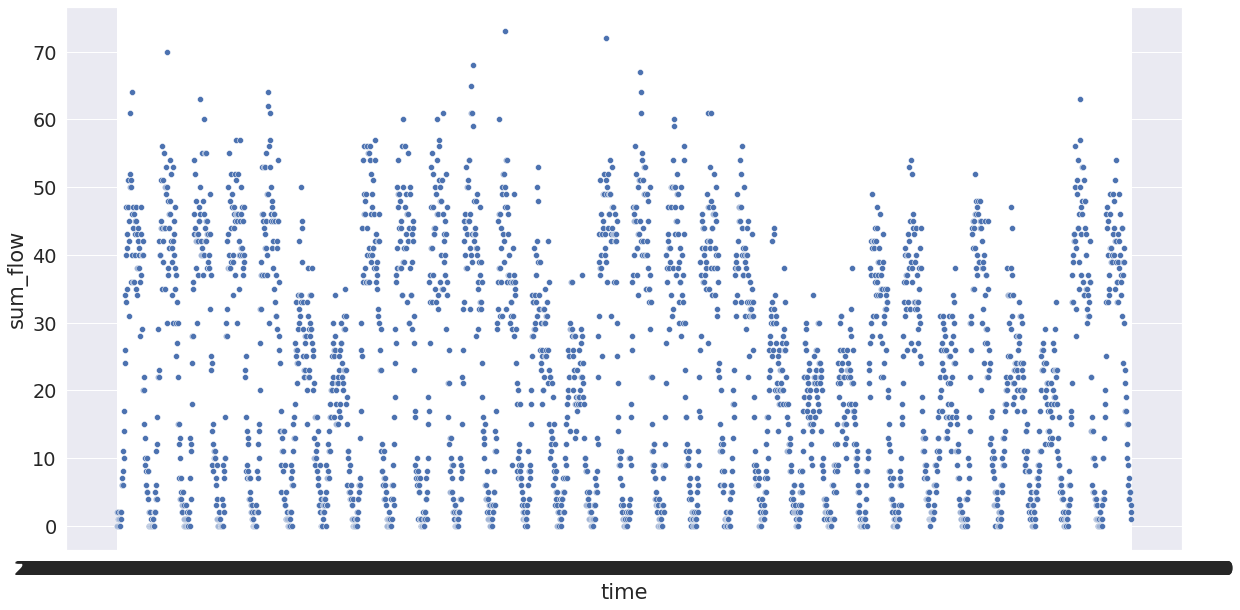

In [36]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="sum_flow", data=df[df["id"]==sensor_to_plot])

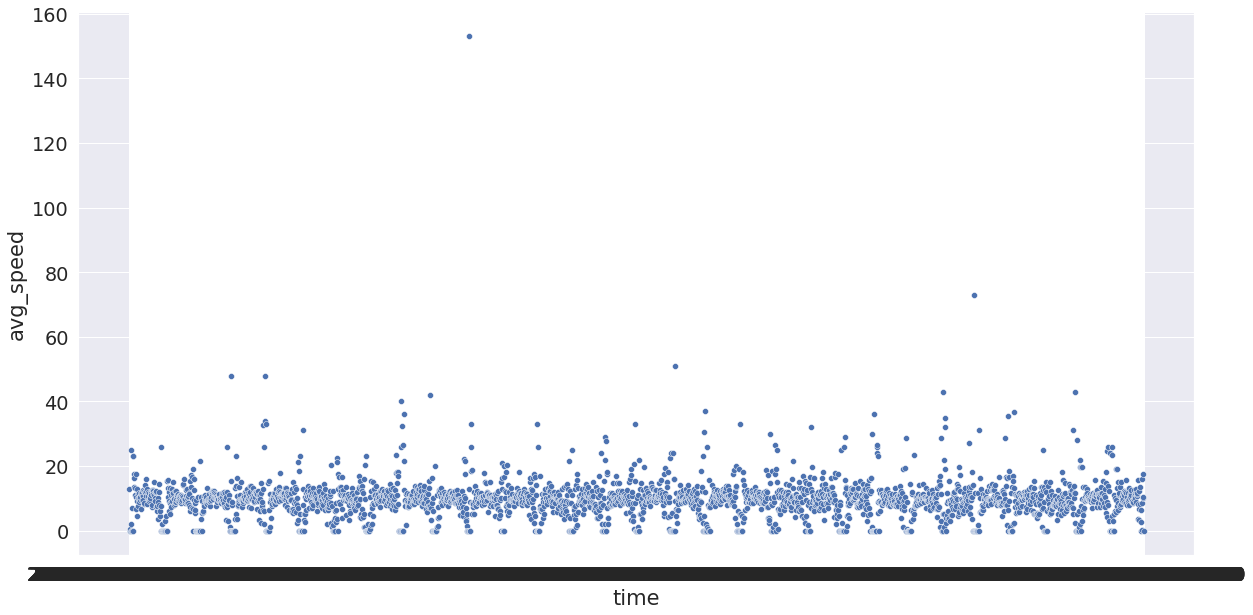

In [37]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="avg_speed", data=df[df["id"]==sensor_to_plot])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


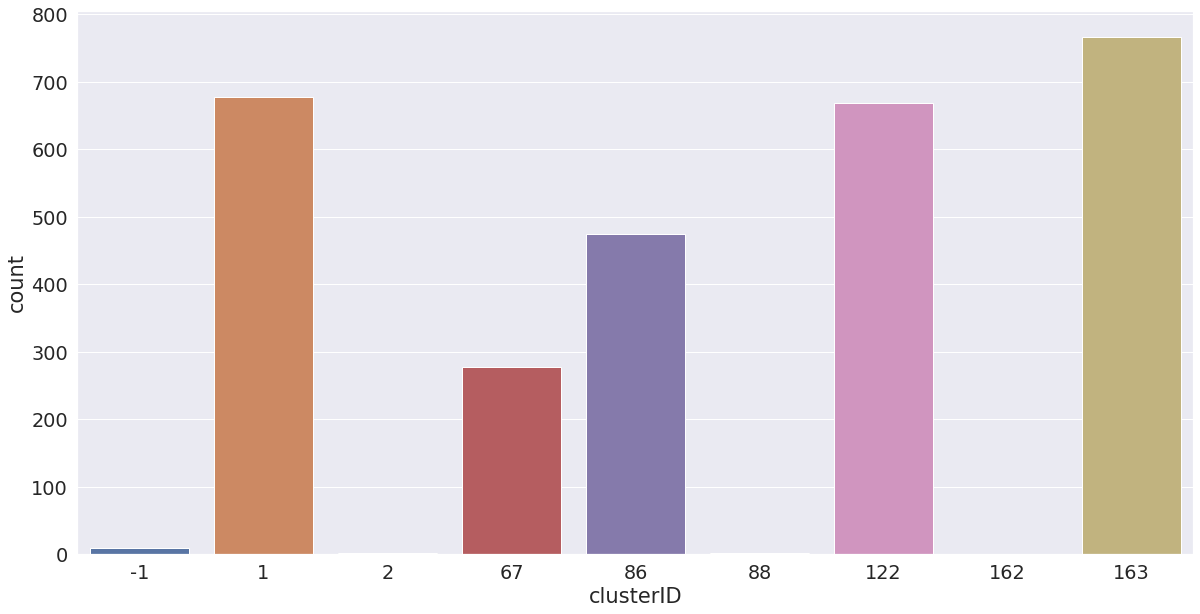

In [38]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.countplot(df[df["id"]==sensor_to_plot].clusterID)

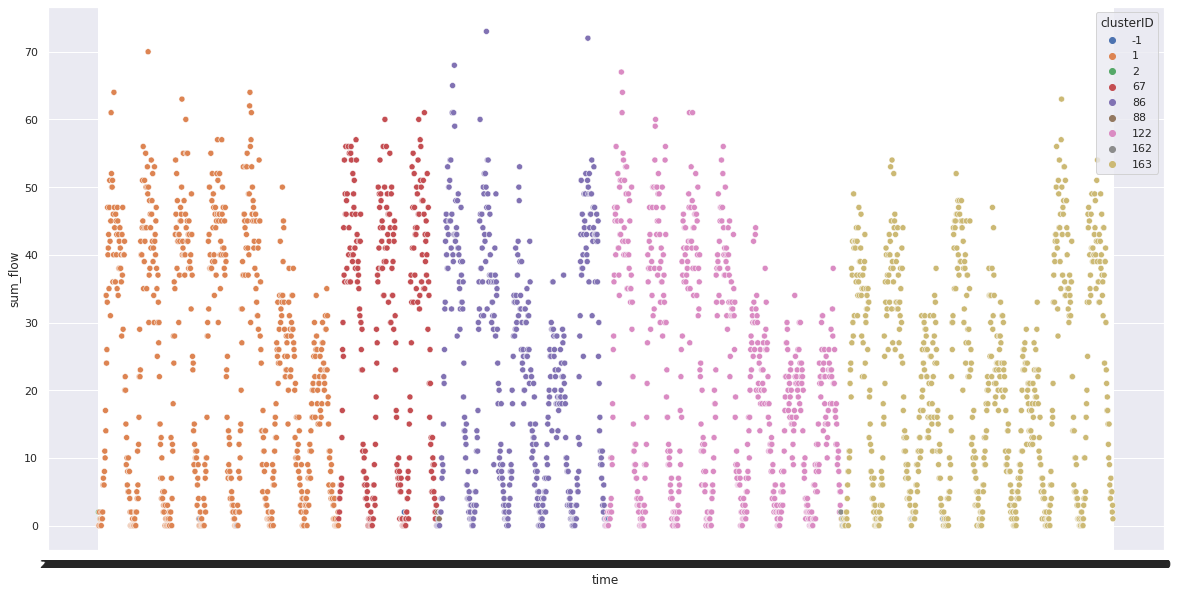

In [39]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="clusterID", palette="deep")

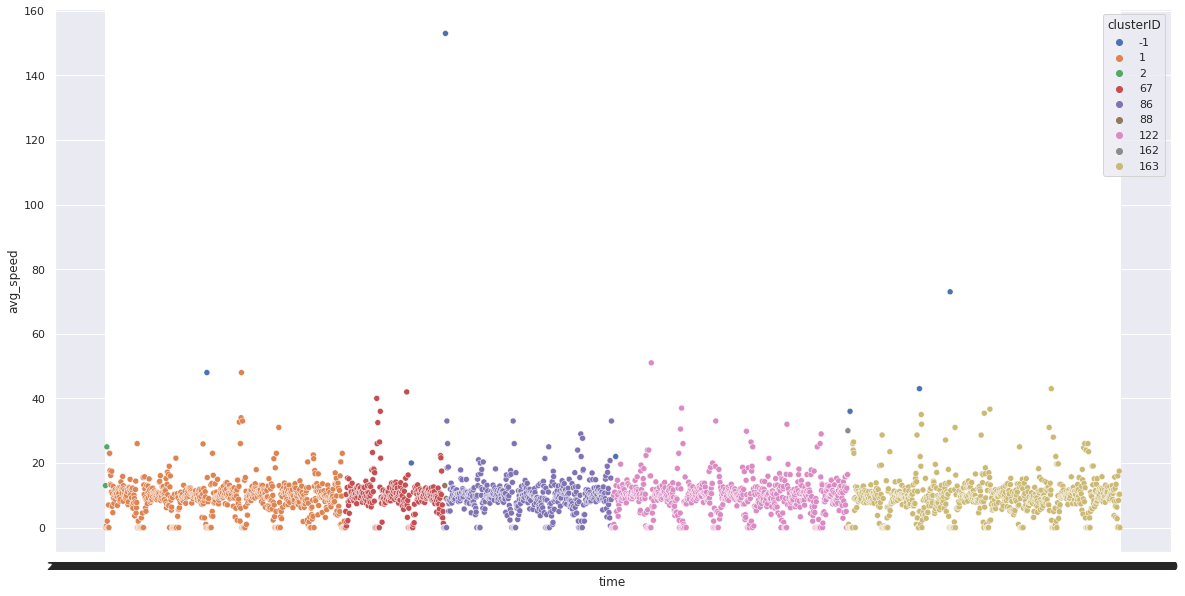

In [40]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="clusterID", palette="deep")

In [41]:
mapping = {-1: 1, -2:2}

df["label"] = 0
df["label"] = df[df["id"]==sensor_to_plot]["clusterID"].map(mapping).fillna(0)

df[df["label"]==1].sum()

id           R002_S1R002_S1R002_S1R002_S1R002_S1R002_S1R002...
time         2019-04-04 00:00:002019-04-05 02:30:002019-04-...
sum_flow                                                     8
avg_speed                                                  395
clusterID                                                   -9
label                                                        9
dtype: object

### Noise

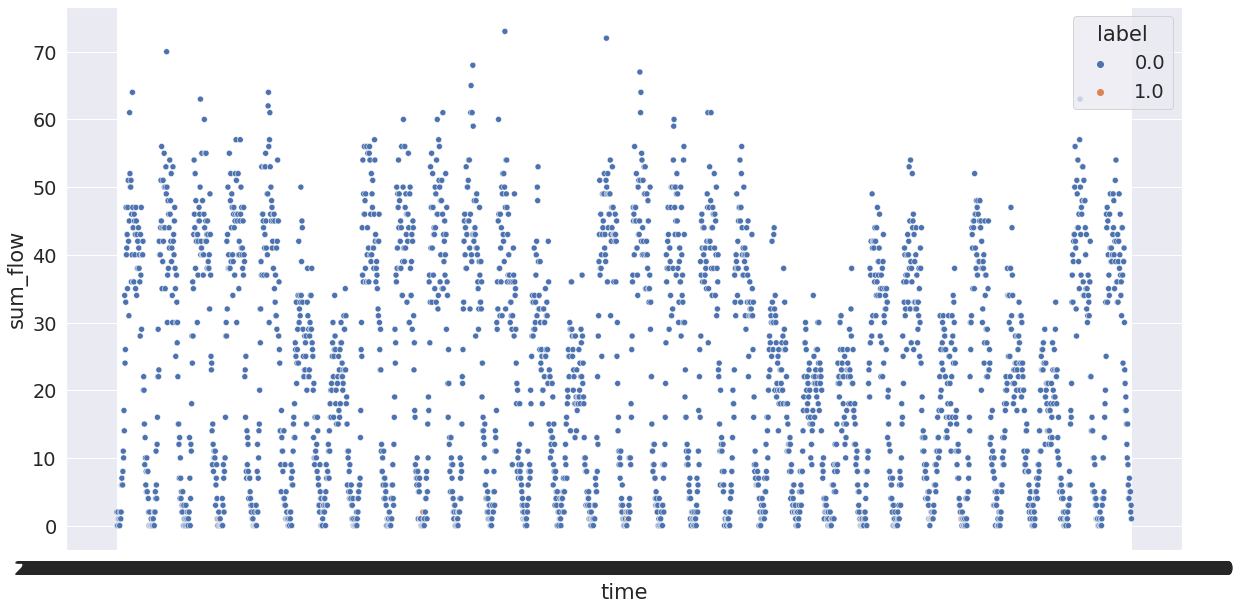

In [42]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="label")

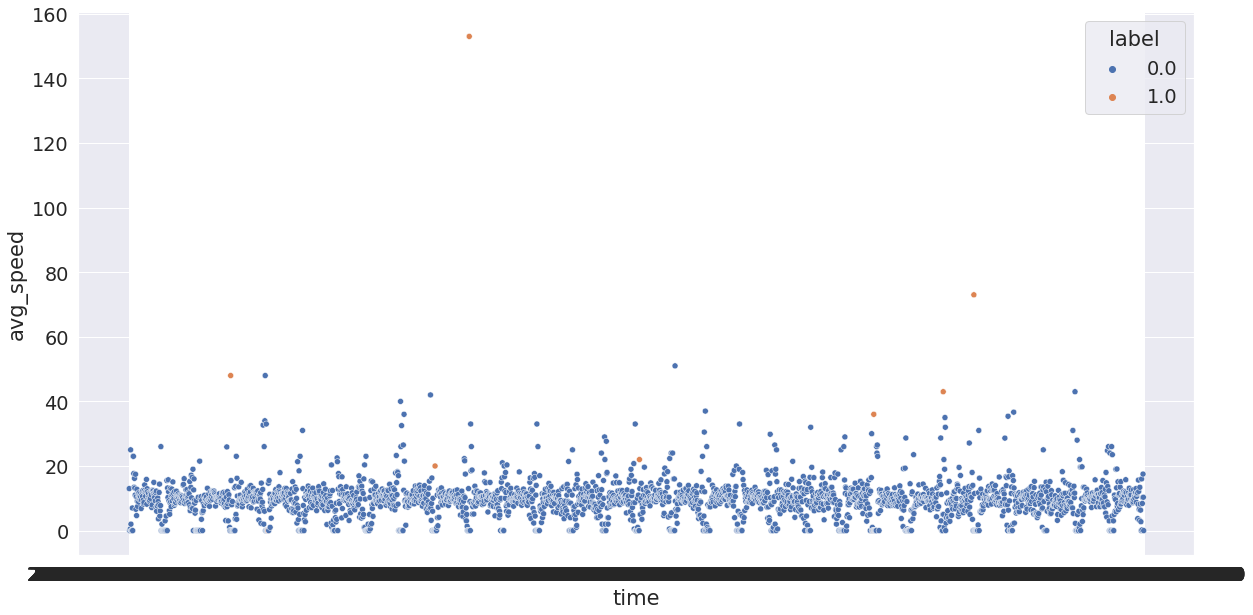

In [43]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="label")

# Nearest Sensor 3

In [49]:
sensor_to_plot = "R002_S5"

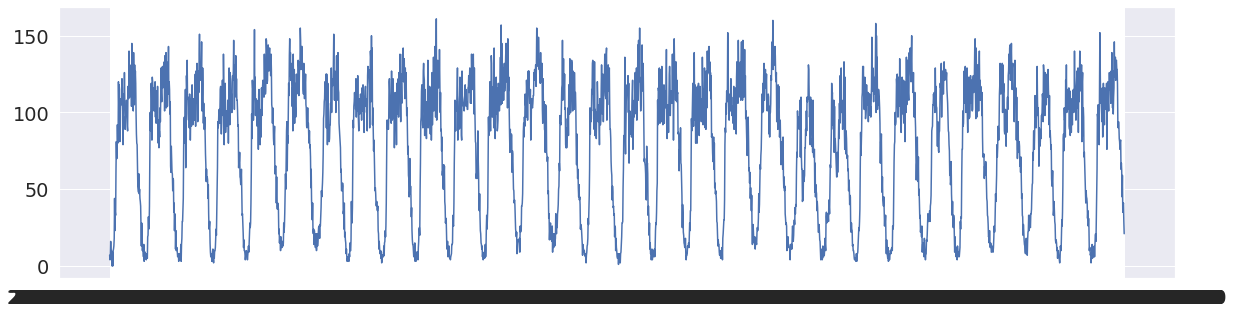

In [50]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['sum_flow'])

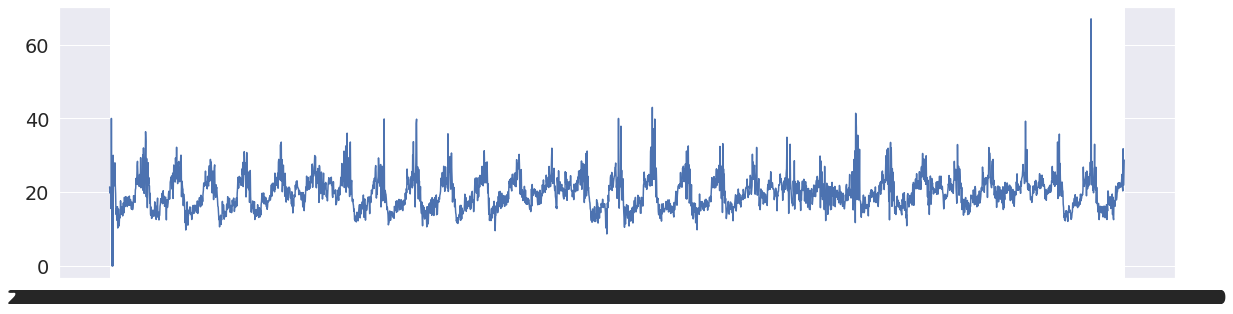

In [51]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['avg_speed'])

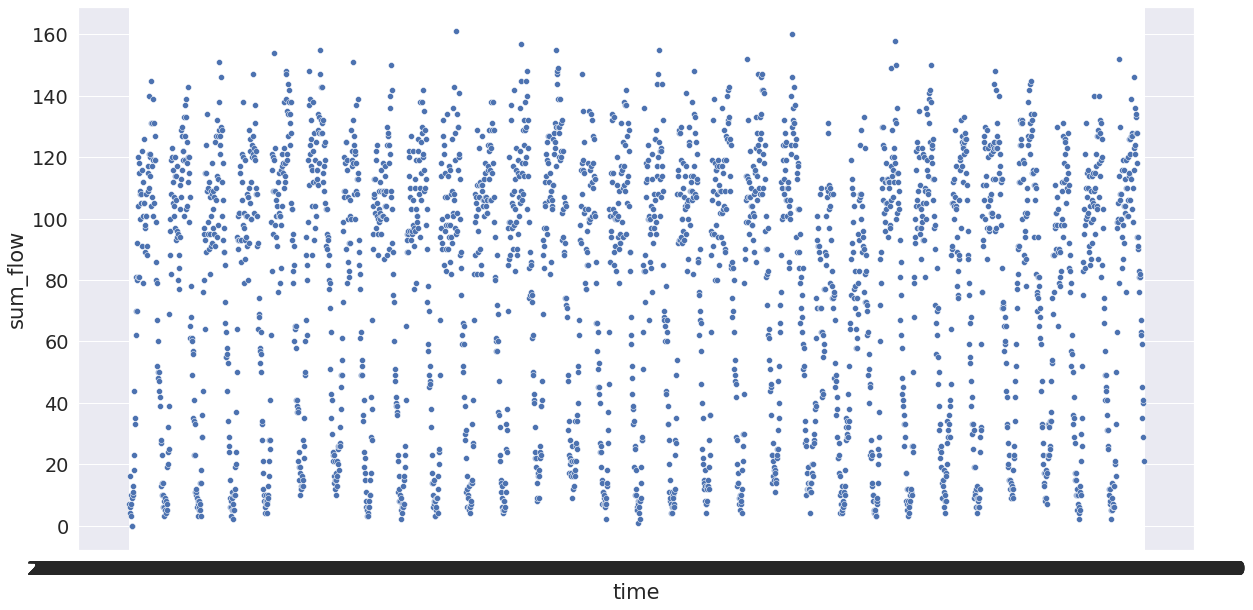

In [52]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="sum_flow", data=df[df["id"]==sensor_to_plot])

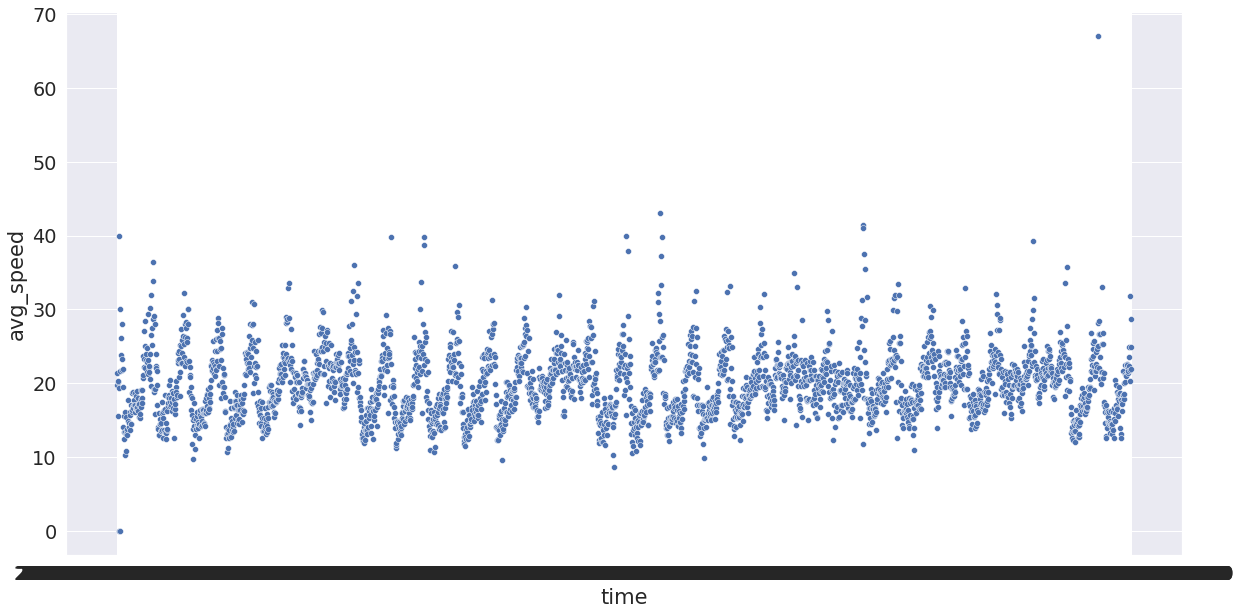

In [53]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="avg_speed", data=df[df["id"]==sensor_to_plot])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


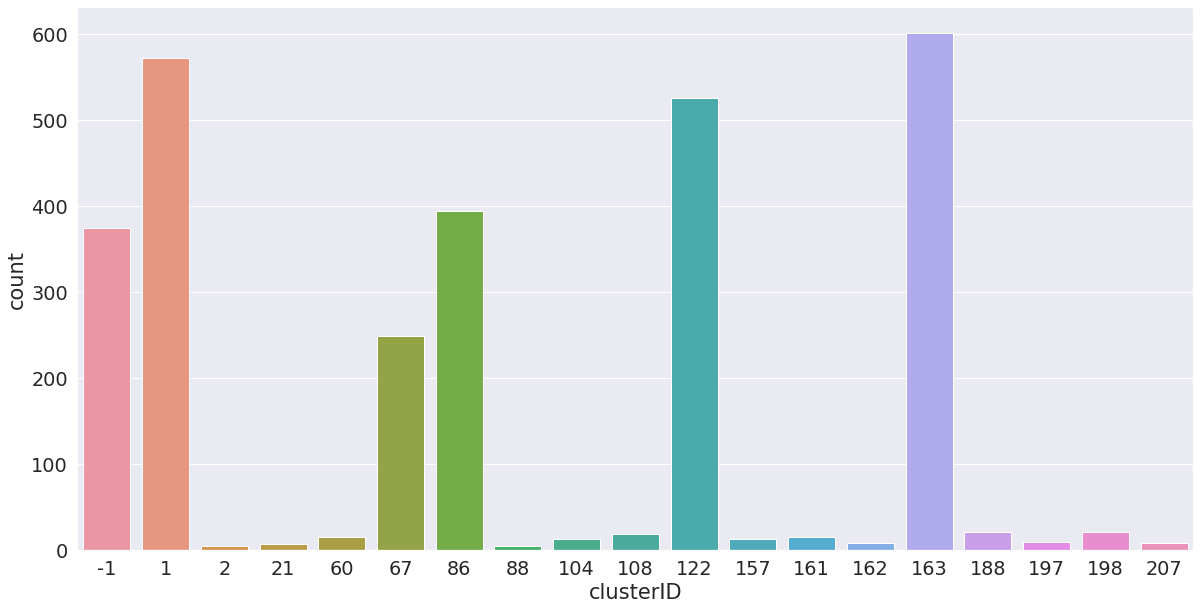

In [54]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.countplot(df[df["id"]==sensor_to_plot].clusterID)

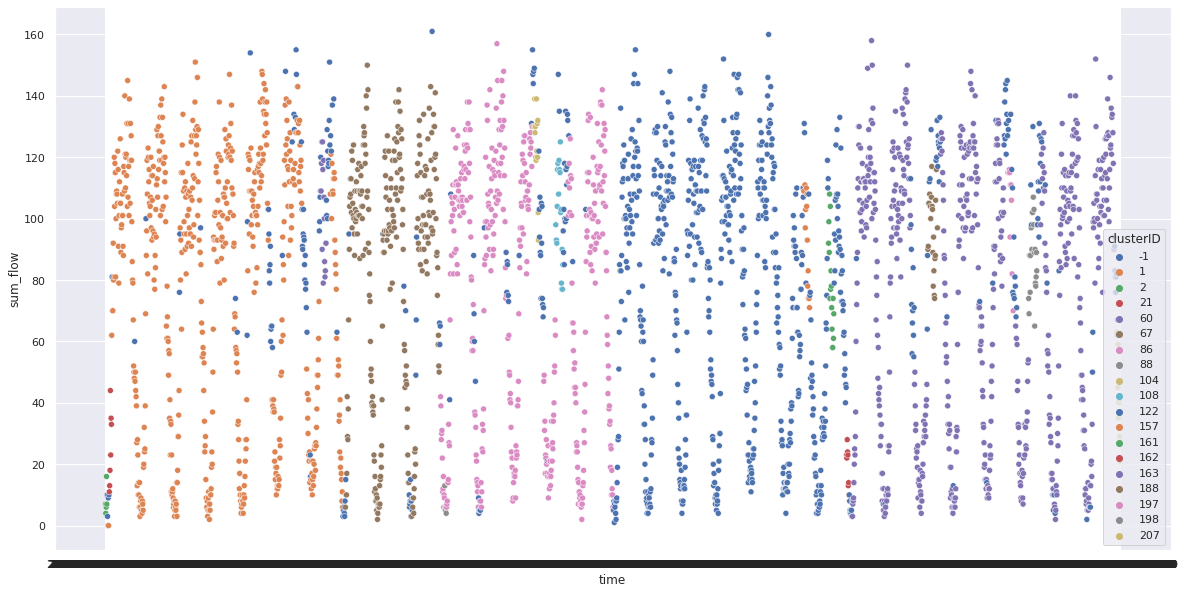

In [55]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="clusterID", palette="deep")

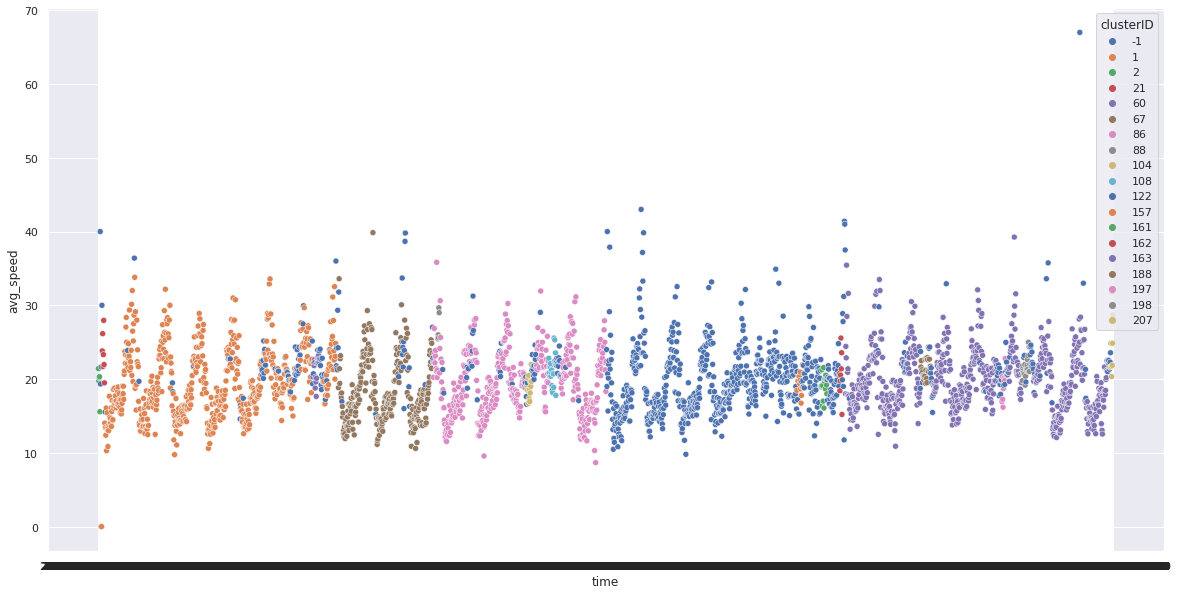

In [56]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="clusterID", palette="deep")

In [57]:
mapping = {-1: 1, -2:2}

df["label"] = 0
df["label"] = df[df["id"]==sensor_to_plot]["clusterID"].map(mapping).fillna(0)

df[df["label"]==1].sum()

id           R002_S5R002_S5R002_S5R002_S5R002_S5R002_S5R002...
time         2019-04-01 01:15:002019-04-01 01:30:002019-04-...
sum_flow                                                 31003
avg_speed                                              8227.83
clusterID                                                 -375
label                                                      375
dtype: object

## Noise

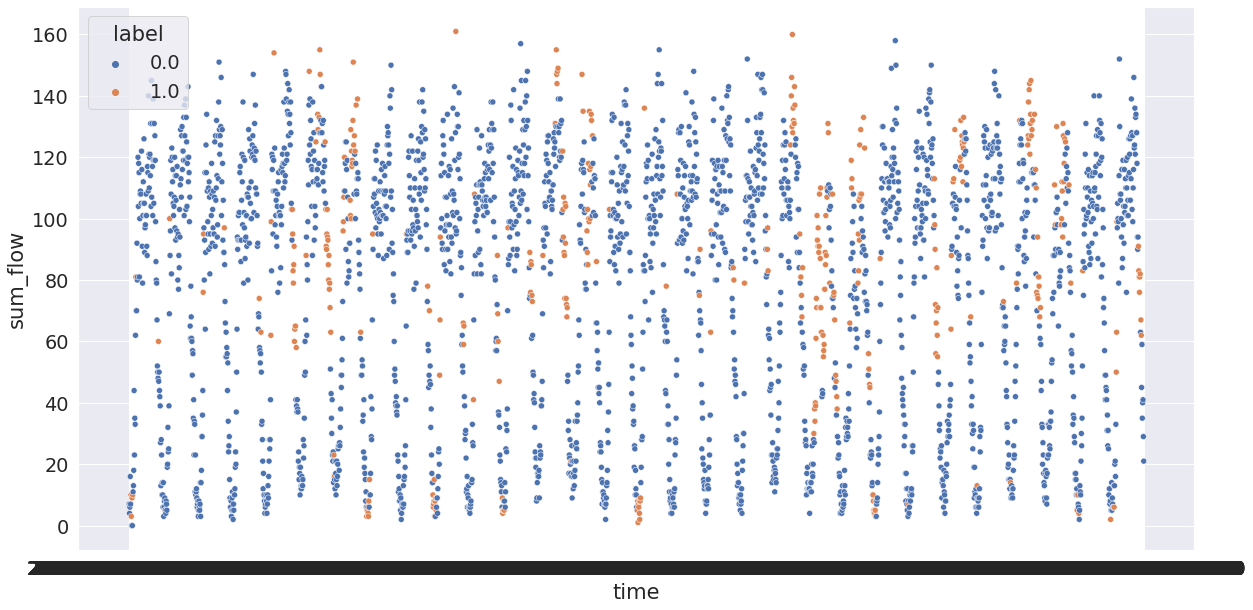

In [58]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="label")

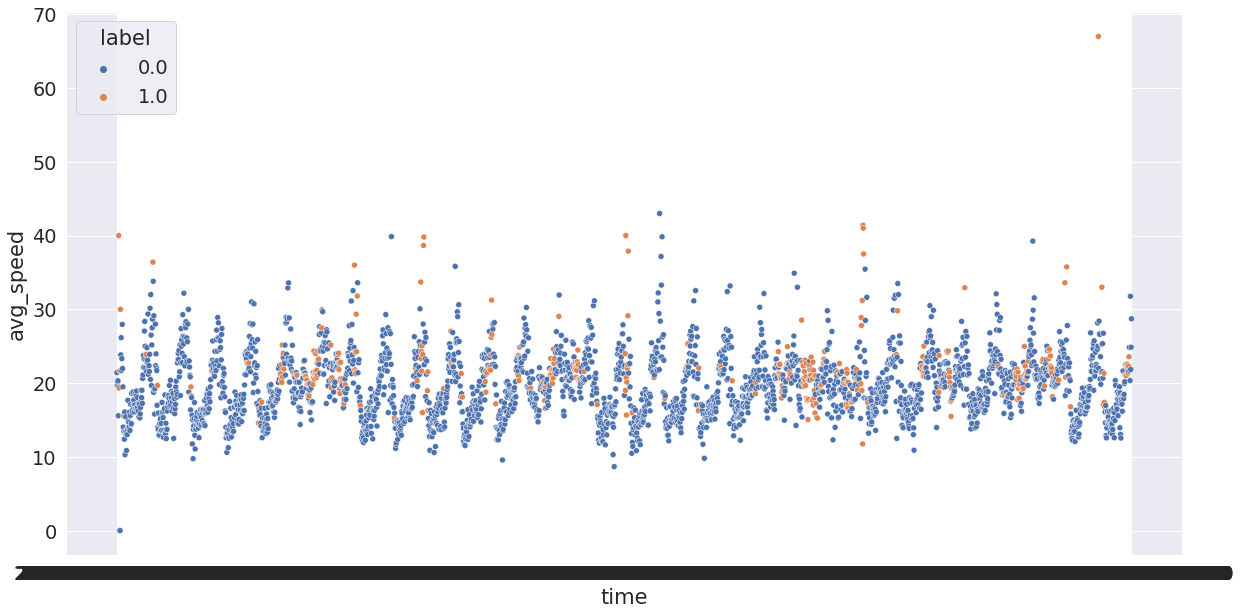

In [59]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="label")

# ALTRO SENSORE

In [71]:
sensor_to_plot = "R133_S4"

In [72]:
sp1 = sp[sp["id1"] == sensor_to_plot]
sp2 = sp[sp["id2"] == sensor_to_plot]
sp_sensor = pd.concat([sp1, sp2], ignore_index=True)

In [73]:
sp_sensor.sort_values("dist")

id1      id2         dist
0     R133_S4  R133_S4     0.000000
21    R133_S4  R133_S4     0.000000
20    R133_S2  R133_S4    39.355882
2     R133_S4  R134_S2    94.287897
1     R133_S4  R134_S1   150.144159
55   R001_SM1  R133_S4   202.748196
46   R001_SM3  R133_S4   214.620809
51    R002_S5  R133_S4   220.724707
45   R001_SM2  R133_S4   222.052473
50    R002_S4  R133_S4   235.261442
49    R002_S2  R133_S4   237.617603
47    R002_S1  R133_S4   240.222283
38    R074_S1  R133_S4   361.220412
37    R074_S2  R133_S4   363.595448
9     R133_S4  R135_S2   364.708452
35    R074_S3  R133_S4   373.692717
10    R133_S4  R135_S1   393.906729
4     R133_S4  R154_S1   420.998687
3     R133_S4  R154_S2   436.041326
23    R116_S2  R133_S4   586.713846
53   R003_SM9  R133_S4   597.970522
54   R003_SM8  R133_S4   598.651945
52   R003_SM6  R133_S4   601.298292
56    R116_S1  R133_S4   602.235506
7     R133_S4  R142_S2   648.806611
29  R032_SM46  R133_S4   655.158294
8     R133_S4  R142_S1   659.005839
48   R003_SM7  R133_S4   660.517951
17    R032_S1  R133_S4   664.297036
28    R032_S2  R133_S4   690.525970
25    R028_S1  R133_S4   692.588162
34    R071_S1  R133_S4   717.382047
26    R028_S2  R133_S4   721.780414
27    R028_S3  R133_S4   728.615293
36    R071_S2  R133_S4   730.320001
39    R077_S2  R133_S4   828.808906
5     R133_S4  R141_S1   839.388322
6     R133_S4  R141_S2   844.350190
30    R069_S1  R133_S4   853.794300
32  R069_SM67  R133_S4   871.335351
12    R029_S2  R133_S4   873.314664
31    R069_S4  R133_S4   874.217384
11    R029_S1  R133_S4   886.072127
44    R131_S2  R133_S4   897.496155
42  R131_SM82  R133_S4   897.983331
19  R131_SM83  R133_S4   904.090562
14    R030_S2  R133_S4   914.376798
41    R131_S1  R133_S4   920.748972
33    R069_S3  R133_S4   926.235118
13    R030_S1  R133_S4   948.825421
22    R085_S2  R133_S4   965.988143
15    R031_S1  R133_S4   997.289144
24    R085_S1  R133_S4  1003.793403
16    R031_S2  R133_S4  1051.447790
18    R092_S1  R133_S4  1166.882866
40    R126_S1  R133_S4  1209.373196
43    R126_S2  R133_S4  1209.486130

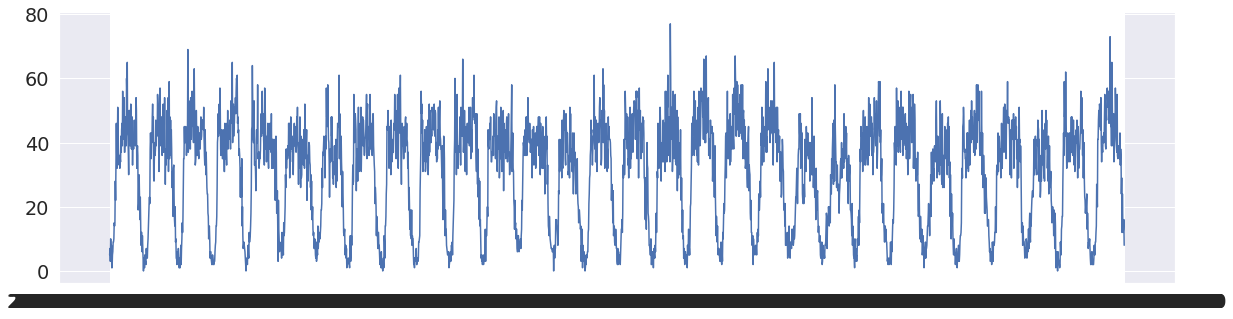

In [75]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['sum_flow'])

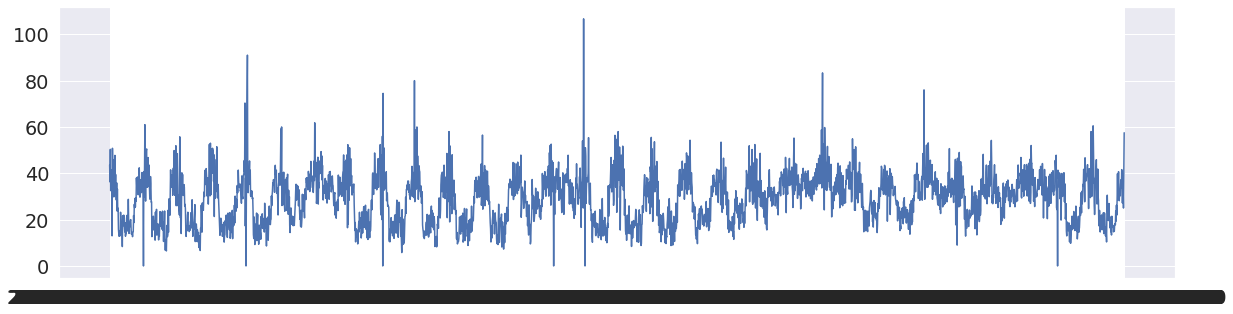

In [76]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['avg_speed'])

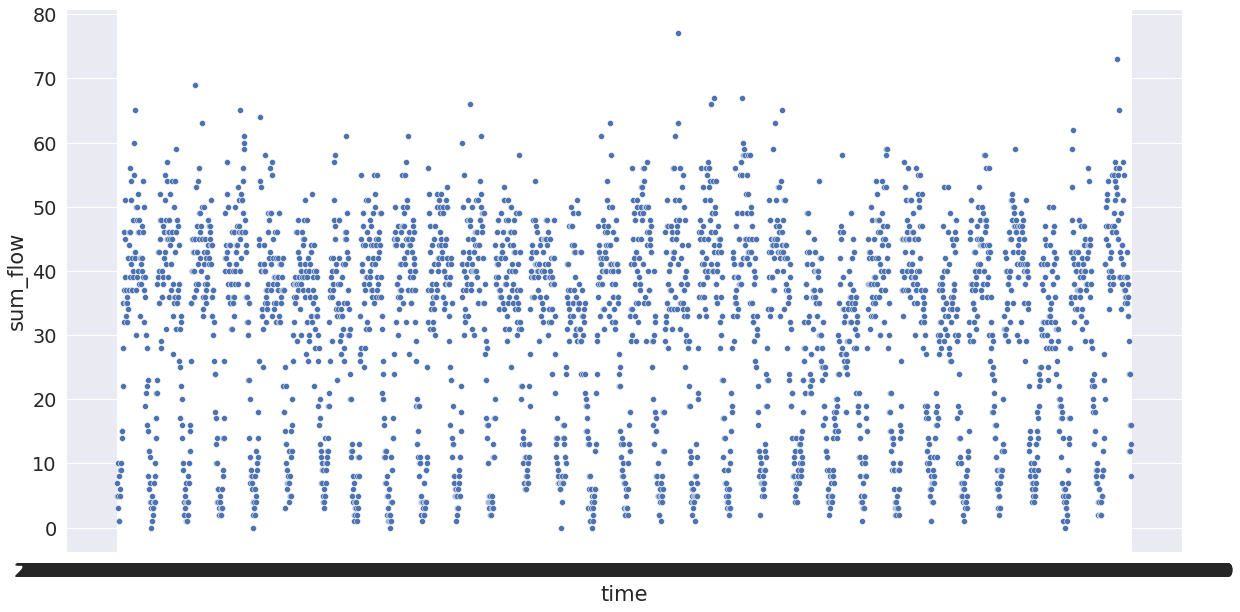

In [77]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="sum_flow", data=df[df["id"]==sensor_to_plot])

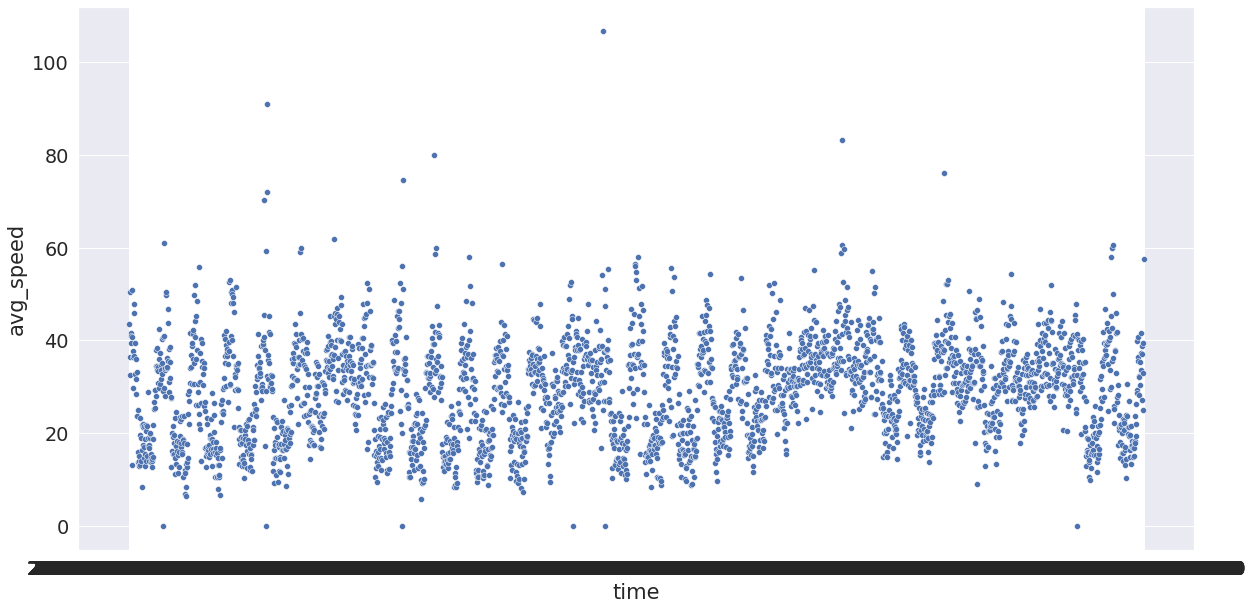

In [78]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="avg_speed", data=df[df["id"]==sensor_to_plot])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


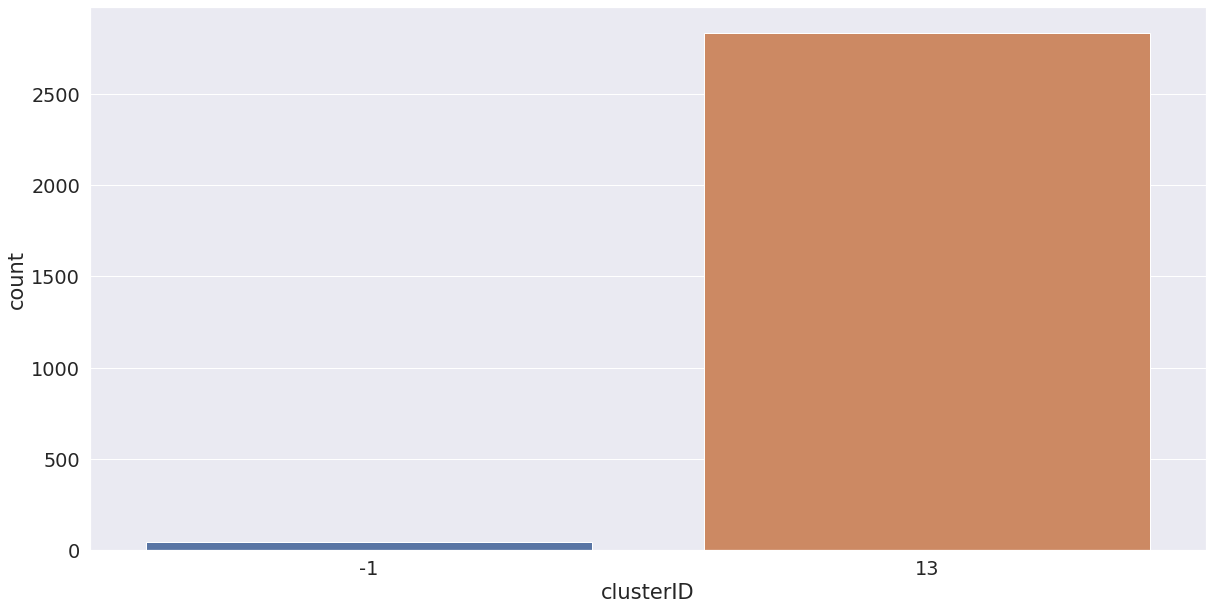

In [79]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.countplot(df[df["id"]==sensor_to_plot].clusterID)

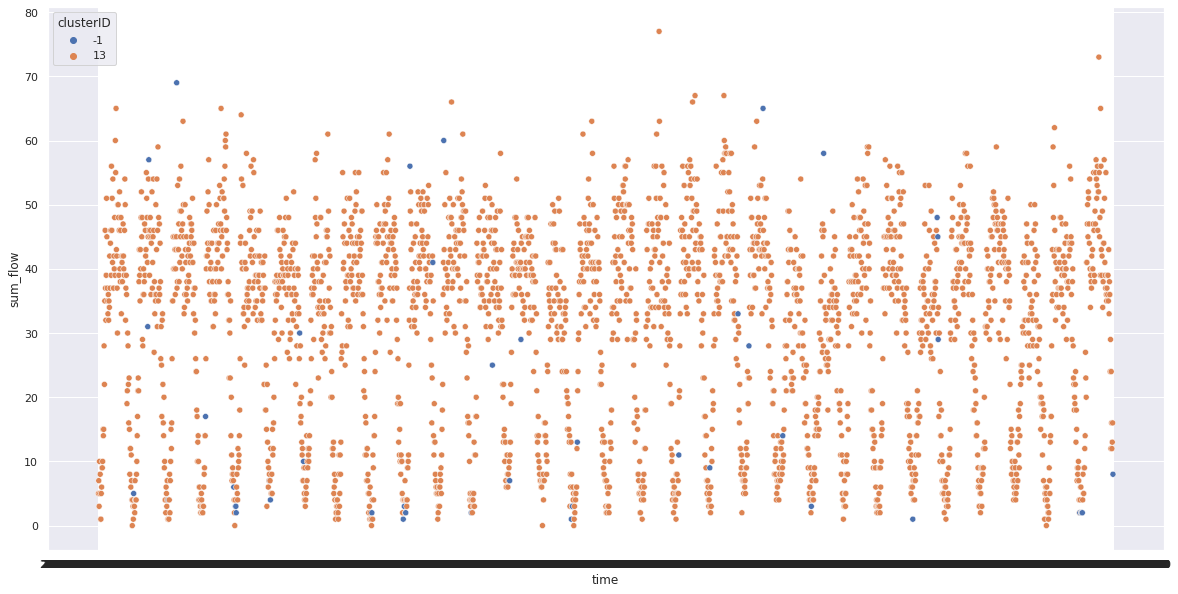

In [80]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="clusterID", palette="deep")

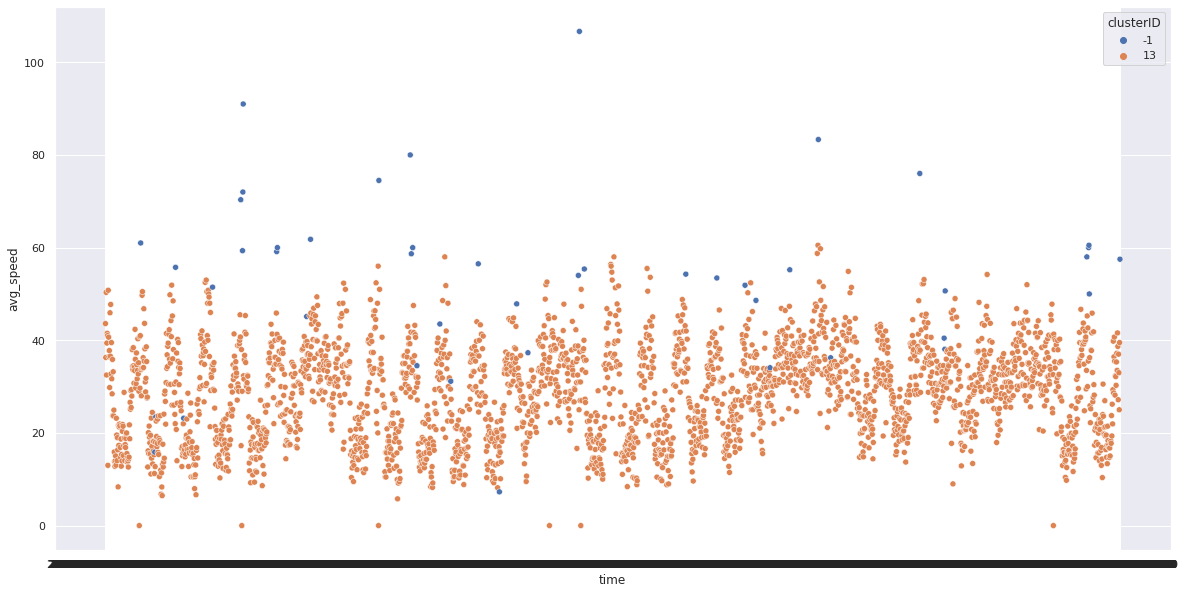

In [81]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="clusterID", palette="deep")

In [82]:
mapping = {-1: 1, -2:2}

df["label"] = 0
df["label"] = df[df["id"]==sensor_to_plot]["clusterID"].map(mapping).fillna(0)

df[df["label"]==1].sum()

id           R133_S4R133_S4R133_S4R133_S4R133_S4R133_S4R133...
time         2019-04-02 01:00:002019-04-02 11:00:002019-04-...
sum_flow                                                   853
avg_speed                                              2405.07
clusterID                                                  -45
label                                                       45
dtype: object

## Noise

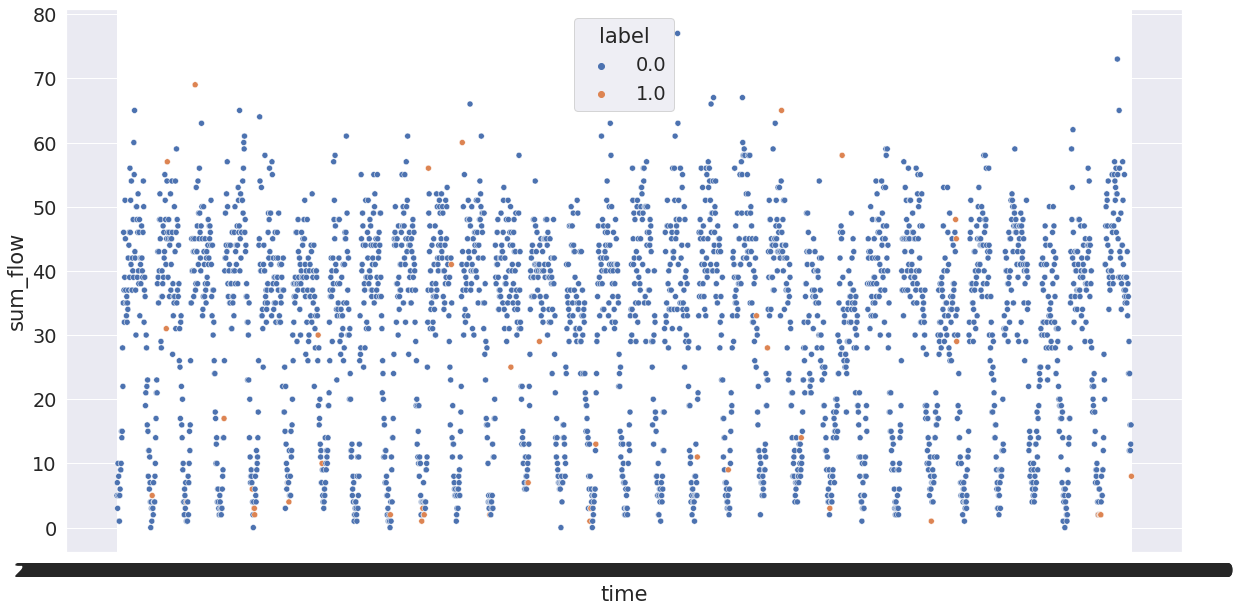

In [83]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="label")

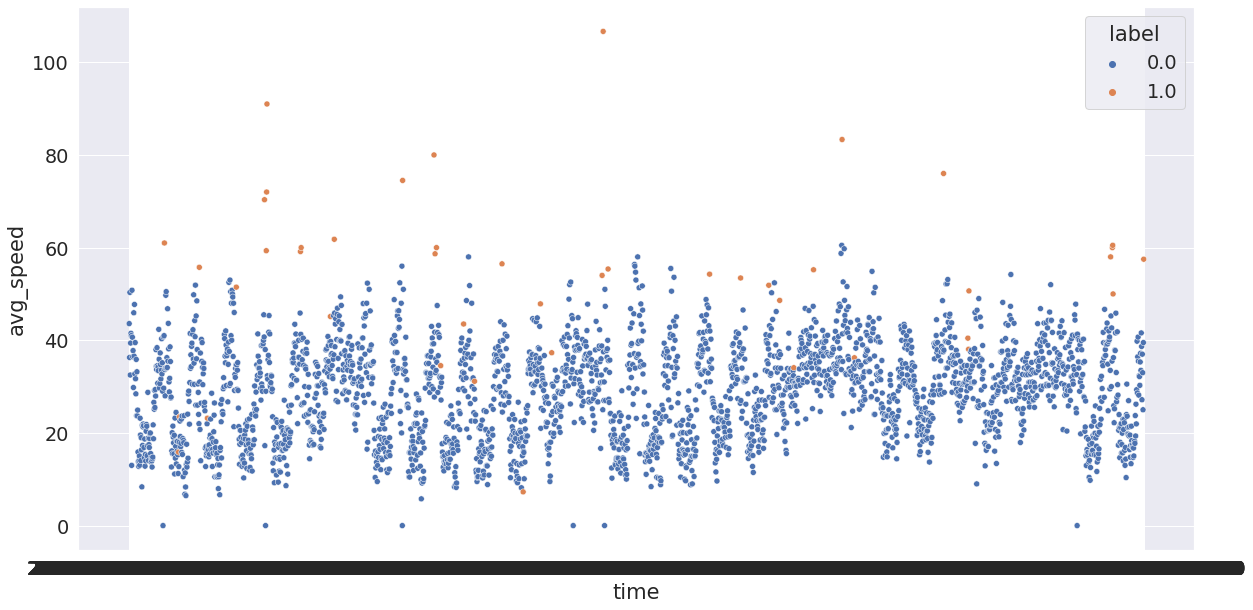

In [84]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="label")

## Analisi su sensore vicino 1

In [85]:
sensor_to_plot = "R133_S2"

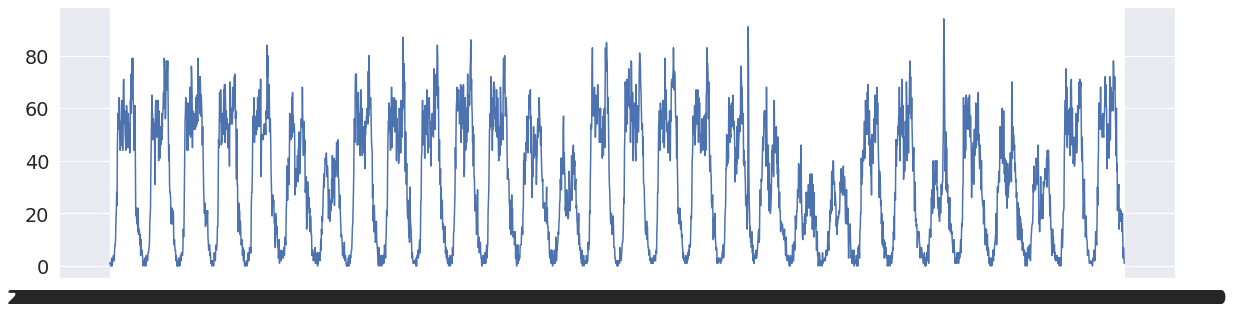

In [86]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['sum_flow'])

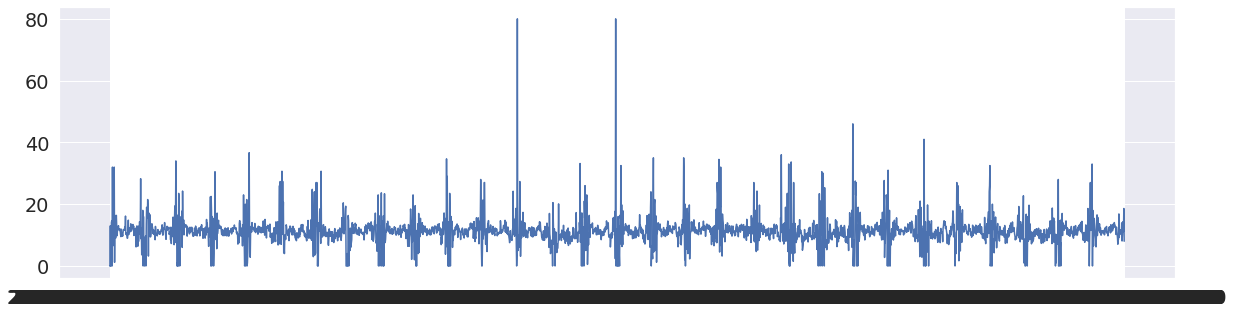

In [87]:
plt.figure(figsize=(20,5))
plt.plot(df[df["id"]==sensor_to_plot]['time'], df[df["id"]==sensor_to_plot]['avg_speed'])

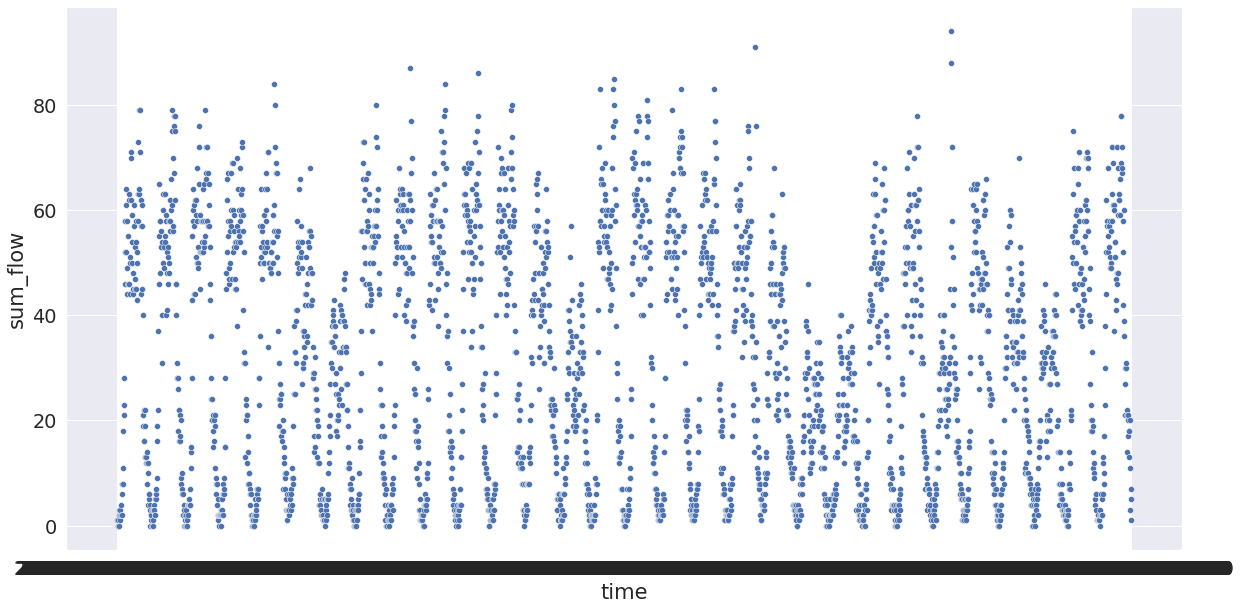

In [88]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="sum_flow", data=df[df["id"]==sensor_to_plot])

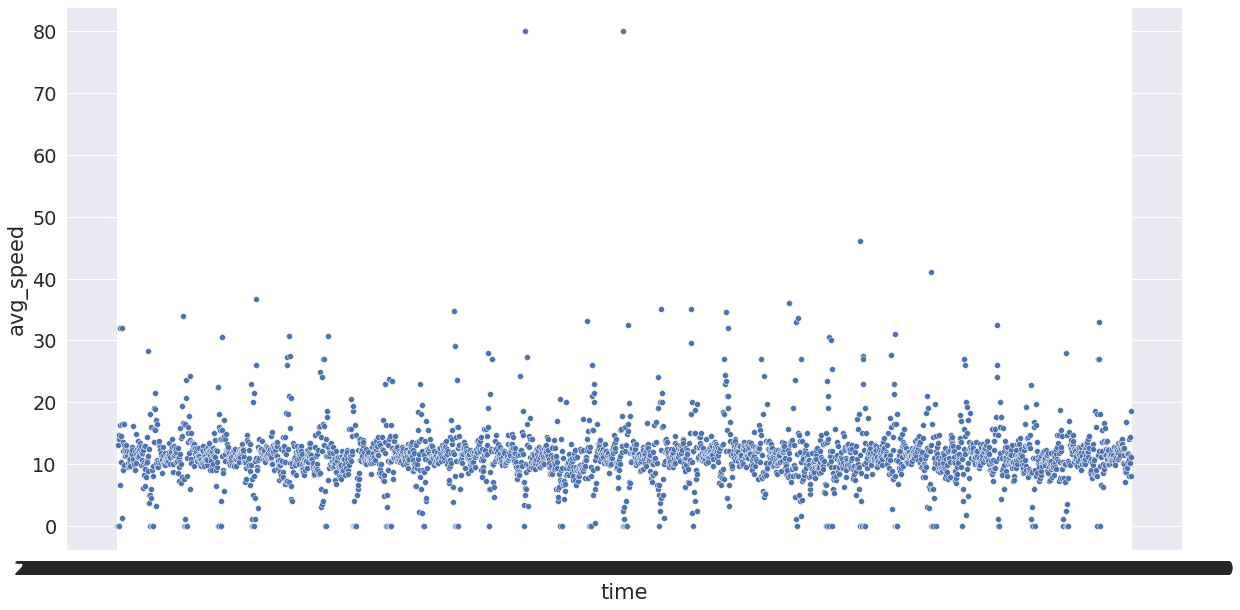

In [89]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.scatterplot(x="time", y="avg_speed", data=df[df["id"]==sensor_to_plot])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


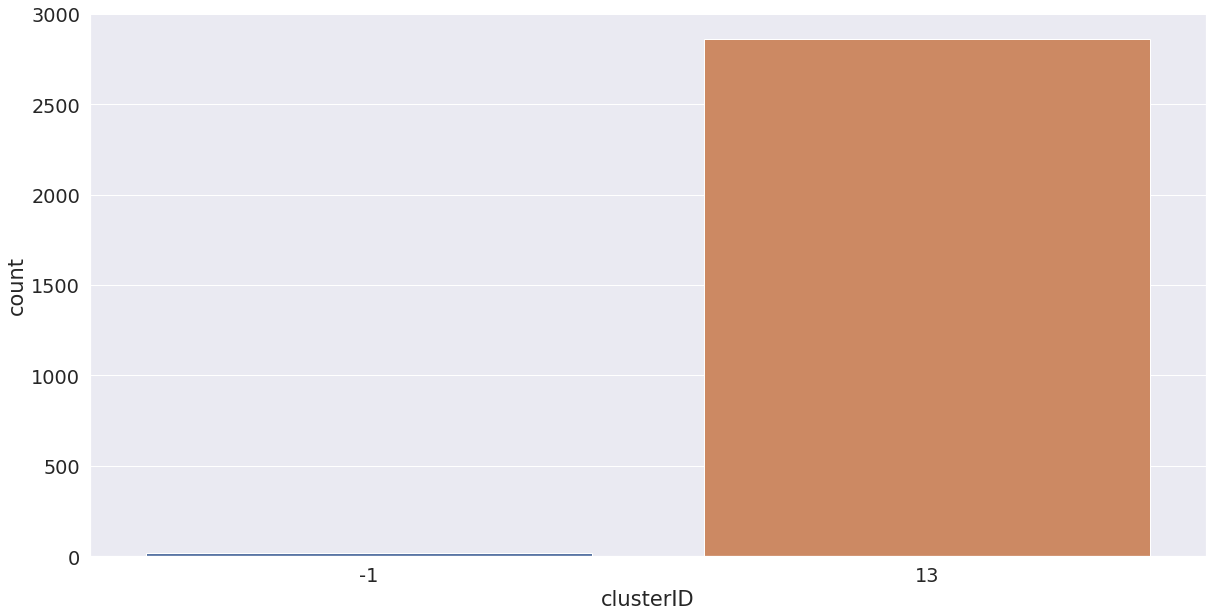

In [90]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
sns.countplot(df[df["id"]==sensor_to_plot].clusterID)

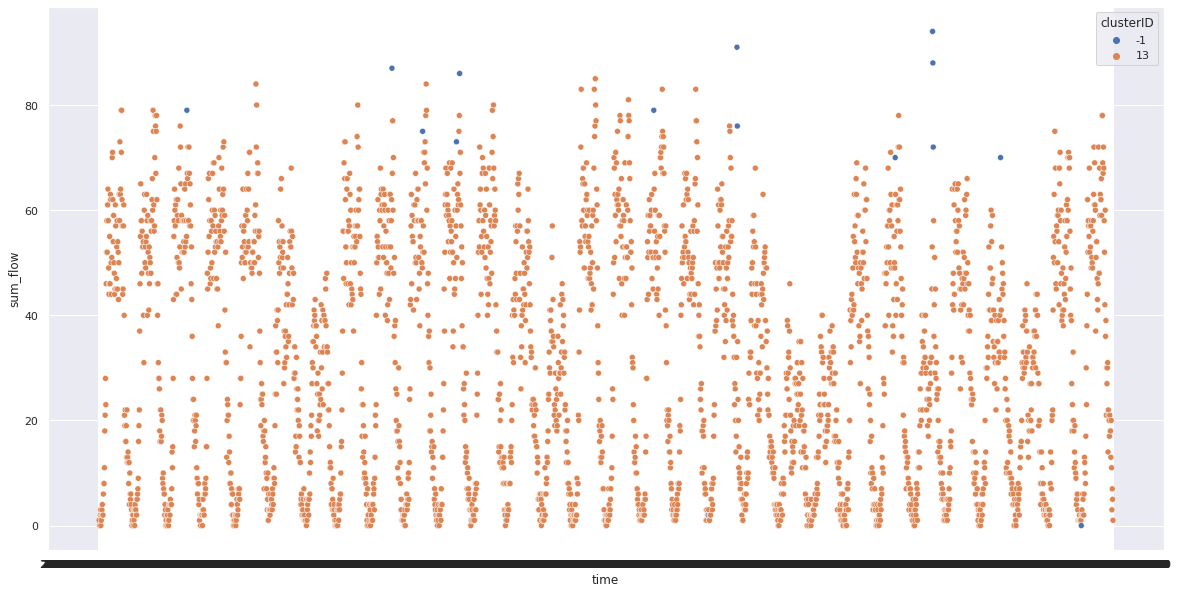

In [91]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="clusterID", palette="deep")

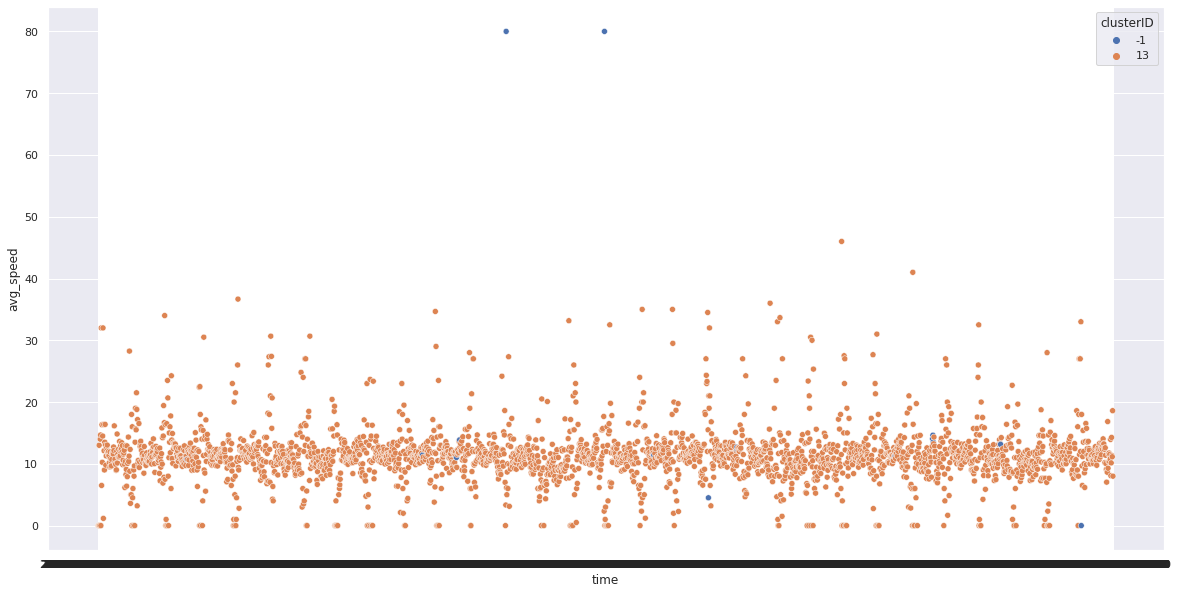

In [92]:
sns.set(font_scale=1, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="clusterID", palette="deep")

In [93]:
mapping = {-1: 1, -2:2}

df["label"] = 0
df["label"] = df[df["id"]==sensor_to_plot]["clusterID"].map(mapping).fillna(0)

df[df["label"]==1].sum()

id           R133_S2R133_S2R133_S2R133_S2R133_S2R133_S2R133...
time         2019-04-03 14:45:002019-04-09 16:15:002019-04-...
sum_flow                                                  1044
avg_speed                                              327.686
clusterID                                                  -17
label                                                       17
dtype: object

### Noise

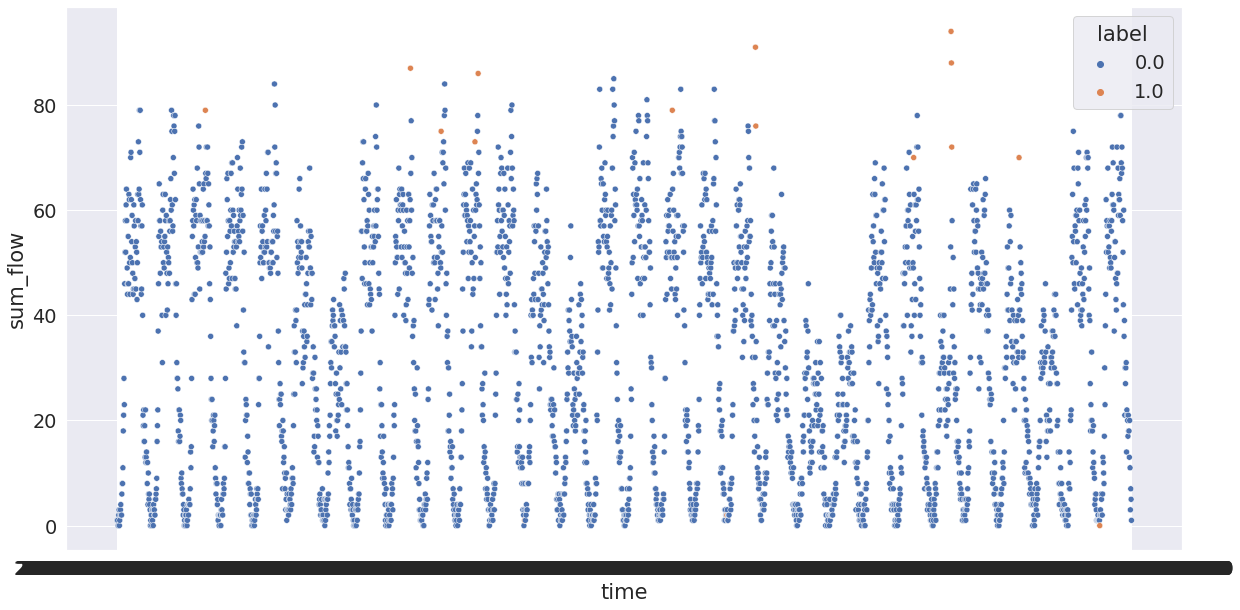

In [94]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="sum_flow", hue="label")

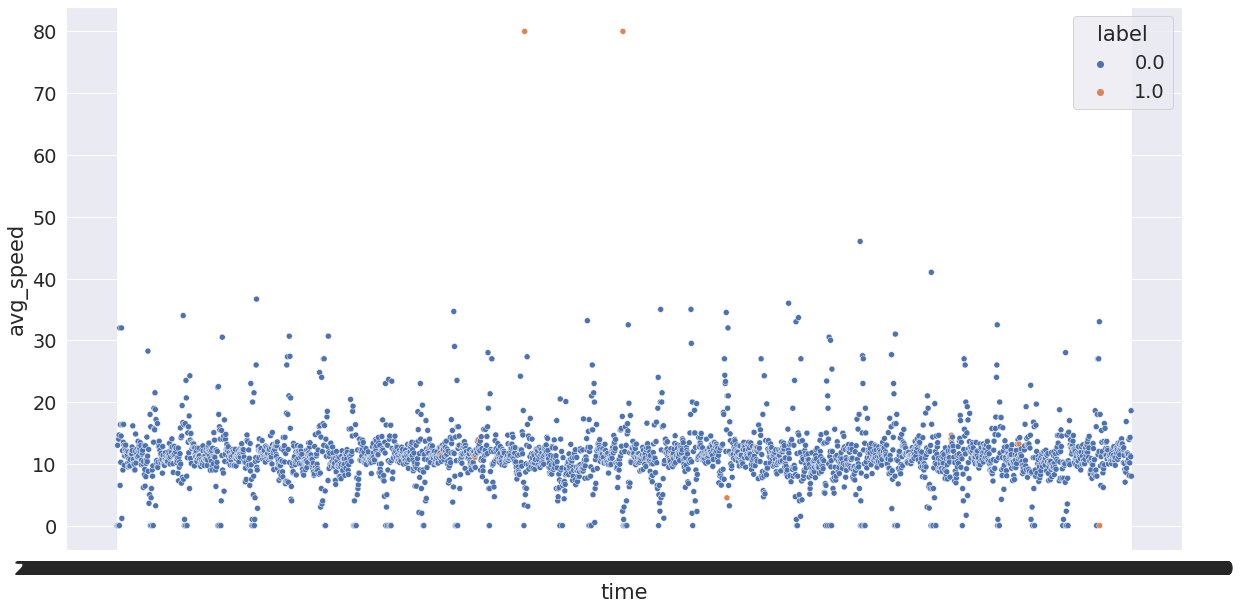

In [95]:
sns.set(font_scale=1.75, rc={'figure.figsize':(20,10)})
g = sns.scatterplot(data=df[df["id"]==sensor_to_plot], x="time", y="avg_speed", hue="label")